<h1>Introduction</h1>
<p>This report presents a data analysis of bike rental data to identify key patterns, trends, and insights that can support operational efficiency, customer satisfaction, and pricing strategies. The analysis is structured into three main parts, each addressing specific aspects of the data preparation, statistical evaluation, and machine learning modeling processes.</p>

<h1>Part 1: Data Preparation and Statistical Analysis</h1>
<p>This section focuses on preparing the dataset for analysis and conducting statistical evaluations. It comprises the following sections:</p>

<h2>Section 1. Data Characterization</h2>
<p>Provides an overview of the dataset, including descriptions of key features and data types.</p>

<h2>Section 2. Data Cleaning</h2>
<p>Details the processes used to handle missing values, correct inconsistencies, and standardize data formats.</p>

<h2>Section 3. Exploratory Data Analysis (EDA)</h2>
<p>Explores trends, distributions, and relationships between variables using visualizations and summary statistics.</p>

<h2>Section 4. Statistical Analysis</h2>
<p>Includes descriptive statistics, correlation analysis, and measures of central tendency and dispersion to uncover patterns in the data.</p>

<h2>Section 5. Encoding and Scaling</h2>
<p>Prepares categorical variables through encoding.</p>

<h2>Section 6. Statistical Testing</h2>
<p>Conducts hypothesis tests to evaluate relationships and differences within the data.</p>

<h2>Section 7. Feature Engineering</h2>
<p>Implements feature engineering.</p>

<h2>Section 8. PCA and LDA</h2>
<p>Implements dimensionality reduction techniques—Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) — to simplify the data and enhance model performance.</p>

<h1>Part 2: Machine Learning</h1>
<p>This section applies machine learning algorithms to predict and classify outcomes based on the prepared data. It includes:</p>

<h2>Section 1. Supervised vs Unsupervised Learning</h2>
<p>Provides a conceptual understanding and logical justification for the specific choice of machine learning approach .</p>

<h2>Section 2. Regression Modeling</h2>
<p>Focuses on supervised learning techniques to predict rental costs.</p>

<h2>Section 3. Classification Modeling</h2>
<p>Implements classification techniques to categorize data, assess performance, and interpret results.</p>

<h1>Part 3: Findings</h1>
<p>The final part of the report summarizes key findings and insights derived from the analysis. It highlights trends, relationships, and recommendations that can inform decision-making for the bike rental firm.</p>

<h1>Part 1: Data Preparation and Statistical Analysis</h1>

<h2>Section 1. Data Characterization</h2>

In this section I will analyze the provided biking dataset by studying its size and number of attributes. I will also check for missing values and validate the ranges of numeric variables to ensure data consistency and completeness. 

**a) Observing and describing data**

In [5]:
import pandas as pd
import seaborn as sns

In [6]:
bikes_df = pd.read_csv("biking_dataset.csv")

In [7]:
bikes_df.head(10)

City Weather Condition  Rider Age Bike Model  Ride Duration (min)  \
0         Berlin             Rainy       53.0   Standard                 62.0   
1  San Francisco            Cloudy       39.0   Standard                  5.0   
2         Berlin             Sunny       43.0   Electric                106.0   
3  San Francisco            Cloudy       24.0   Standard                119.0   
4       New York             Sunny       24.0   Mountain                 11.0   
5         Berlin             Rainy       25.0   Mountain                 92.0   
6  San Francisco            Cloudy       43.0   Mountain                 73.0   
7         London             Snowy       41.0   Standard                 89.0   
8        Chicago             Rainy       41.0   Mountain                 96.0   
9  San Francisco            Cloudy       57.0   Electric                 22.0   

   Distance Covered (km) Rider Satisfaction  Bike Rental Cost ($)  
0                   2.25               High                 22.63  
1                  21.67             Medium                  7.87  
2                  28.40               High                 39.40  
3                   5.66                Low                 37.63  
4                  25.74                Low                 13.12  
5                  19.34               High                 30.61  
6                  39.50                Low                 31.23  
7                  28.84               High                 29.84  
8                  26.47             Medium                 36.27  
9                  23.03               High                 25.04

In [8]:
bikes_df.tail(10)

City Weather Condition  Rider Age Bike Model  \
890        Chicago             Snowy       54.0   Mountain   
891       New York             Sunny       49.0   Standard   
892  San Francisco             Sunny       60.0   Mountain   
893         Berlin             Snowy       54.0   Electric   
894         Dublin             Snowy       56.0   Mountain   
895       New York             Rainy       55.0   Electric   
896         London            Cloudy       47.0   Mountain   
897  San Francisco             Sunny       49.0   Mountain   
898        Chicago             Sunny       19.0   Mountain   
899         Dublin             Rainy       37.0   Standard   

     Ride Duration (min)  Distance Covered (km) Rider Satisfaction  \
890                  6.0                  26.31               High   
891                116.0                  21.12               High   
892                 31.0                  24.51               High   
893                  6.0                  15.61               High   
894                 98.0                    NaN                Low   
895                 55.0                  28.35             Medium   
896                 14.0                  11.99               High   
897                 23.0                   2.78               High   
898                110.0                   2.27               High   
899                 17.0                   9.70             Medium   

     Bike Rental Cost ($)  
890                 15.74  
891                 36.19  
892                 17.92  
893                 17.39  
894                 38.59  
895                 26.30  
896                 13.78  
897                 20.47  
898                 39.62  
899                 13.02

In [9]:
bikes_df.shape

(900, 8)

In [10]:
bikes_df.describe()

Rider Age  Ride Duration (min)  Distance Covered (km)  \
count  885.000000           887.000000             887.000000   
mean    39.264407            62.225479              20.130530   
std     12.373803            33.956434              11.178777   
min     18.000000             5.000000               0.510000   
25%     29.000000            32.000000              10.830000   
50%     39.000000            62.000000              19.990000   
75%     50.000000            92.000000              29.155000   
max     60.000000           120.000000              39.870000   

       Bike Rental Cost ($)  
count            891.000000  
mean              26.581470  
std                9.438224  
min                7.330000  
25%               19.210000  
50%               27.040000  
75%               33.955000  
max               48.380000

In [11]:
bikes_df.describe(include=object)

City Weather Condition Bike Model Rider Satisfaction
count      890               889        890                889
unique       6                 4          4                  3
top     London             Rainy   Mountain               High
freq       186               245        298                319

In [12]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   890 non-null    object 
 1   Weather Condition      889 non-null    object 
 2   Rider Age              885 non-null    float64
 3   Bike Model             890 non-null    object 
 4   Ride Duration (min)    887 non-null    float64
 5   Distance Covered (km)  887 non-null    float64
 6   Rider Satisfaction     889 non-null    object 
 7   Bike Rental Cost ($)   891 non-null    float64
dtypes: float64(4), object(4)
memory usage: 56.4+ KB


In [13]:
bikes_df.dtypes

City                      object
Weather Condition         object
Rider Age                float64
Bike Model                object
Ride Duration (min)      float64
Distance Covered (km)    float64
Rider Satisfaction        object
Bike Rental Cost ($)     float64
dtype: object

**b) Selecting columns from dataframes**

In [15]:
bikes_Dublin_df = bikes_df.loc[bikes_df['City']=='Dublin']

In [16]:
bikes_Dublin_df.head()

City Weather Condition  Rider Age Bike Model  Ride Duration (min)  \
73   Dublin             Sunny       30.0        NaN                  NaN   
117  Dublin             Rainy       53.0   Mountain                102.0   
119  Dublin            Cloudy       49.0   Mountain                119.0   
197  Dublin             Rainy       42.0   Standard                 92.0   
271  Dublin            Cloudy       38.0   Mountain                  NaN   

     Distance Covered (km) Rider Satisfaction  Bike Rental Cost ($)  
73                   11.93                NaN                 28.91  
117                  23.05             Medium                 36.69  
119                    NaN             Medium                 40.66  
197                  34.54               High                 30.84  
271                  25.22                Low                 31.57

**c) Missing Values**

In [18]:
bikes_df.isnull().sum()

City                     10
Weather Condition        11
Rider Age                15
Bike Model               10
Ride Duration (min)      13
Distance Covered (km)    13
Rider Satisfaction       11
Bike Rental Cost ($)      9
dtype: int64

The dataset under analysis comprises of **900 observations and 8 features** as described in the data dictionary provided. The dataset has both features of **categorical and numeric data types**, providing a diverse range of information about bike rentals. 

Key attributes include details about the **city, weather conditions, bike model, and rider satisfaction alongside numeric values such as rider age, ride duration, distance covered, and bike rental cost**.

The dataset appears to provide information about a wide spectrum of scenarios, such as varying weather conditions and different bike types, allowing for both classification and regression tasks. **The target variables for analysis include Rider Satisfaction (categorical) and Bike Rental Cost ($) (numeric)**, making this dataset suitable for both predictive modeling and exploratory data analysis.

**The dataset also has missing values across all features**.

<h2>Section 2. Data Cleaning</h2>

In this section I will perform data cleaning by handling missing values, checking for duplicated values, irrelevant data, outliers and data type conversion errors.

**a) Checking for Irrelevant data**

In this case, column-wise all features seem to be necessary and provide relevant information. Similarly, row-wise all rows except the observations with missing values seem to be relevant. Thus, missing values will have to be addressed to increase the relevancy of the dataset. 

**b) Checking for Duplicates**

In [26]:
bikes_df.duplicated().sum()

0

No repeated data points were found in the dataset.

**c) Checking for Missing Values & Handling Missing Values**

In [29]:
bikes_df.isnull().sum()

City                     10
Weather Condition        11
Rider Age                15
Bike Model               10
Ride Duration (min)      13
Distance Covered (km)    13
Rider Satisfaction       11
Bike Rental Cost ($)      9
dtype: int64

The size of the dataset is 8 columns and 900 observations. Given this, we can see that City has 10 missing values, Weather Condition has 11 missing value, Rider Age has 15 missing values, Bike Model has 10 missing values, Ride Duration has 13 missing values, Distance Covered has 13 missing values, Rider Satisfaction has 11 missing value and Bike Rental Cost has 9 missing values

In [31]:
bikes_df.describe()

Rider Age  Ride Duration (min)  Distance Covered (km)  \
count  885.000000           887.000000             887.000000   
mean    39.264407            62.225479              20.130530   
std     12.373803            33.956434              11.178777   
min     18.000000             5.000000               0.510000   
25%     29.000000            32.000000              10.830000   
50%     39.000000            62.000000              19.990000   
75%     50.000000            92.000000              29.155000   
max     60.000000           120.000000              39.870000   

       Bike Rental Cost ($)  
count            891.000000  
mean              26.581470  
std                9.438224  
min                7.330000  
25%               19.210000  
50%               27.040000  
75%               33.955000  
max               48.380000

**Rider Age**
Since the mean (39.26) and median (39.00) are close, it suggests the data may be fairly symmetric (not strongly skewed to the right).
Filling with the median would be safer choice.

**Ride Duration (min)**
The mean (62.23) and median (62.00) are almost identical, which again suggests a symmetric distribution.
Filling with either mean or median should be fine, but median is slightly safer against potential skew.

**Distance Covered (km)**
The mean (20.13) and median (19.99) are very close.
Like before, filling with the median is preferable for robustness against potential skew.

**Bike Rental Cost ($)**
The mean (26.58) and median (27.04) are close, but there’s a slight gap suggesting mild skewness to the left.
The median is a better choice for filling missing values.

*Numerical Data - Filling Missing Values with the Median*

In [34]:
# Fill numerical columns with their medians
bikes_df['Rider Age'] = bikes_df['Rider Age'].fillna(bikes_df['Rider Age'].median())
bikes_df['Ride Duration (min)'] = bikes_df['Ride Duration (min)'].fillna(bikes_df['Ride Duration (min)'].median())
bikes_df['Distance Covered (km)'] = bikes_df['Distance Covered (km)'].fillna(bikes_df['Distance Covered (km)'].median())
bikes_df['Bike Rental Cost ($)'] = bikes_df['Bike Rental Cost ($)'].fillna(bikes_df['Bike Rental Cost ($)'].median())

*Categorical Data - Filling Missing Values with the Mode*

In [36]:
# Fill categorical columns with their mode
bikes_df['City'] = bikes_df['City'].fillna(bikes_df['City'].mode()[0])
bikes_df['Weather Condition'] = bikes_df['Weather Condition'].fillna(bikes_df['Weather Condition'].mode()[0])
bikes_df['Bike Model'] = bikes_df['Bike Model'].fillna(bikes_df['Bike Model'].mode()[0])
bikes_df['Rider Satisfaction'] = bikes_df['Rider Satisfaction'].fillna(bikes_df['Rider Satisfaction'].mode()[0])

**d) Checking for Data Type Conversion Errors**

In [38]:
bikes_df.dtypes

City                      object
Weather Condition         object
Rider Age                float64
Bike Model                object
Ride Duration (min)      float64
Distance Covered (km)    float64
Rider Satisfaction        object
Bike Rental Cost ($)     float64
dtype: object

**City**: Correct as object, as it's a categorical variable.**Weather Condition**: Correct as object, since it's also categorical.**Rider Age**: *Currently float64. Since ages are whole numbers, we might have to convert this to **INT** if there are no fractional values.* **Bike Model**: Correct as object, since it's a categorical variable.**Ride Duration (min)**: *Currently float64. Ride durations are typically measured in whole minutes, so we might convert this to **INT** unless there are fractional values.* **Distance Covered (km)**: Currently float64. This is fine, as distance can have fractional values (e.g., 5.2 km).**Rider Satisfaction**: Correct as object, as it's categorical.**Bike Rental Cost**: Currently float64. This is correct, as costs can have decimal values (e.g., $10.50).

In [77]:
# Checking for fractional values in Rider Age 
fractional_age = bikes_df[bikes_df['Rider Age'] % 1 != 0]['Rider Age']

print(fractional_age)

Series([], Name: Rider Age, dtype: float64)


In [79]:
# Checking for fractional values in Ride Duration 
fractional_duration = bikes_df[bikes_df['Ride Duration (min)'] % 1 != 0]['Ride Duration (min)']

print(fractional_duration)

Series([], Name: Ride Duration (min), dtype: float64)


No fractional values were found for Rider Age and Ride Duration columns, so they will be converted to integers.

In [81]:
bikes_df['Rider Age'] = bikes_df['Rider Age'].astype(int)
bikes_df['Ride Duration (min)'] = bikes_df['Ride Duration (min)'].astype(int)

In [83]:
bikes_df.dtypes

City                      object
Weather Condition         object
Rider Age                  int32
Bike Model                object
Ride Duration (min)        int32
Distance Covered (km)    float64
Rider Satisfaction        object
Bike Rental Cost ($)     float64
dtype: object

**e) Checking for Outliers** 

*Numeric Features*

In [85]:
print(bikes_df.describe())

        Rider Age  Ride Duration (min)  Distance Covered (km)  \
count  900.000000           900.000000              900.00000   
mean    39.260000            62.222222               20.12850   
std     12.270186            33.710037               11.09767   
min     18.000000             5.000000                0.51000   
25%     29.000000            33.000000               11.04000   
50%     39.000000            62.000000               19.99000   
75%     50.000000            92.000000               29.02750   
max     60.000000           120.000000               39.87000   

       Bike Rental Cost ($)  
count            900.000000  
mean              26.586056  
std                9.390973  
min                7.330000  
25%               19.282500  
50%               27.040000  
75%               33.935000  
max               48.380000  


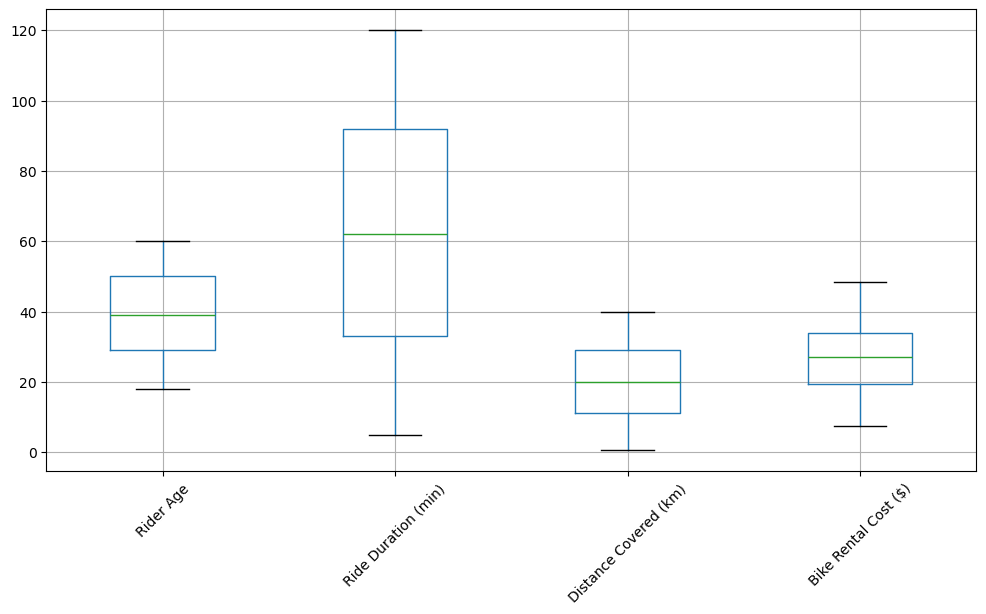

In [87]:
import matplotlib.pyplot as plt

# Plotting all numeric columns
bikes_df.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

**Rider Age**: most of the observations for rider age are within the interquartile range (IQR), spanning roughly 25 to 45 years. No noticeable outliers are present, as all data points lie within the whiskers.The median age (green line) appears around 35 years. **Ride Duration (min)**: this variable shows high variability with a wider IQR, ranging approximately from 30 to 90 minutes.There are no clear outliers as all values fall within the whiskers.The median ride duration is around 60 minutes.**Distance Covered (km)**:the IQR spans from approximately 5 km to 20 km. There is one potential outlier above the upper whisker (~35 km).The median distance covered is around 12 km.**Bike Rental Cost ($)**:the IQR ranges from 15 to 45 USD.There are no significant outliers detected, as all points lie within the whiskers.The median rental cost is close to 25 USD.

Thus, Ride Duration and Distance Covered show higher variability than other features. Only Distance Covered (km) suggests the presence of a potential outlier that may need further investigation. No extreme outliers were detected for Rider Age, Ride Duration (min), or Bike Rental Cost ($).

**f) Renaming**

In [89]:
# Renaming Columns
bikes_df = bikes_df.rename(columns={
    'Ride Duration (min)': 'Ride_Duration_min',
    'Bike Rental Cost ($)': 'Bike_Rental_Cost_USD',
    'Distance Covered (km)': 'Distance_Covered_km'
})

print(bikes_df.head())

            City Weather Condition  Rider Age Bike Model  Ride_Duration_min  \
0         Berlin             Rainy         53   Standard                 62   
1  San Francisco            Cloudy         39   Standard                  5   
2         Berlin             Sunny         43   Electric                106   
3  San Francisco            Cloudy         24   Standard                119   
4       New York             Sunny         24   Mountain                 11   

   Distance_Covered_km Rider Satisfaction  Bike_Rental_Cost_USD  
0                 2.25               High                 22.63  
1                21.67             Medium                  7.87  
2                28.40               High                 39.40  
3                 5.66                Low                 37.63  
4                25.74                Low                 13.12  


In [91]:
bikes_df.dtypes

City                     object
Weather Condition        object
Rider Age                 int32
Bike Model               object
Ride_Duration_min         int32
Distance_Covered_km     float64
Rider Satisfaction       object
Bike_Rental_Cost_USD    float64
dtype: object

In [93]:
print(bikes_df['City'].value_counts())

City
London           196
Berlin           171
San Francisco    168
New York         168
Chicago          168
Dublin            29
Name: count, dtype: int64


In [95]:
print(bikes_df['Weather Condition'].value_counts())

Weather Condition
Rainy     256
Sunny     220
Snowy     218
Cloudy    206
Name: count, dtype: int64


In [97]:
print(bikes_df['Bike Model'].value_counts())

Bike Model
Mountain    308
Standard    297
Electric    294
Manual        1
Name: count, dtype: int64


In [99]:
print(bikes_df['Rider Satisfaction'].value_counts())

Rider Satisfaction
High      330
Medium    299
Low       271
Name: count, dtype: int64


Checking for rare categories or data entry errors based on unexpected values or very low frequency.

<h2>Section 3. Exploratory Data Analysis (EDA)</h2>

Then, we also prepare data visualizations to illustrate statistical relationships between variables, examining the distributions of various features, their correlations, and other patterns within the dataset to better understand the context of the data and explore any present patterns or variances.

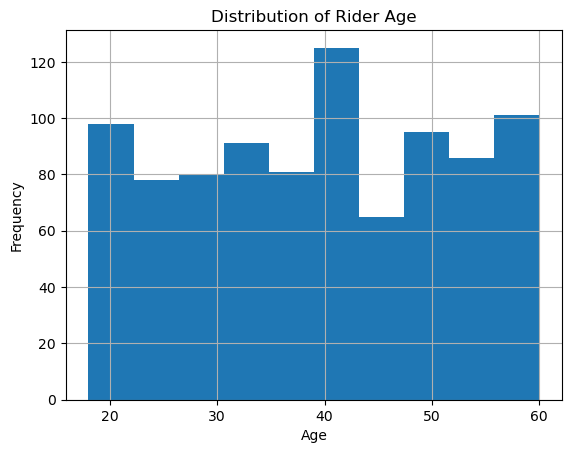

In [101]:
import matplotlib.pyplot as plt
bikes_df['Rider Age'].hist(bins=10)
plt.title('Distribution of Rider Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

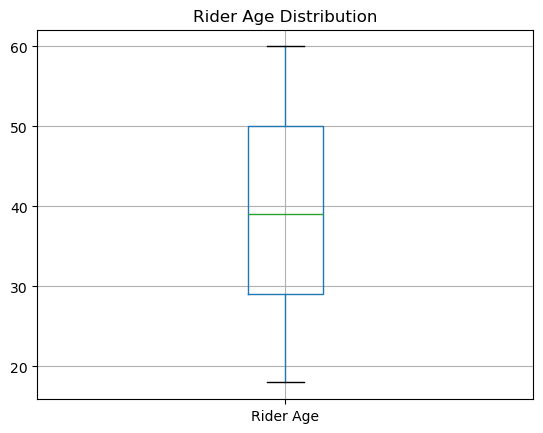

In [103]:
bikes_df.boxplot(column='Rider Age')
plt.title('Rider Age Distribution')
plt.show()

Rider age ranges from 18 to 60, distributed quite evenly with no extreme outliers. Indicating a broad target age group, which allows for general marketing strategies. Thus, the firm can focus on promoting bikes for all age groups, but especially to the target demographic, which is primarily working-age adults. 

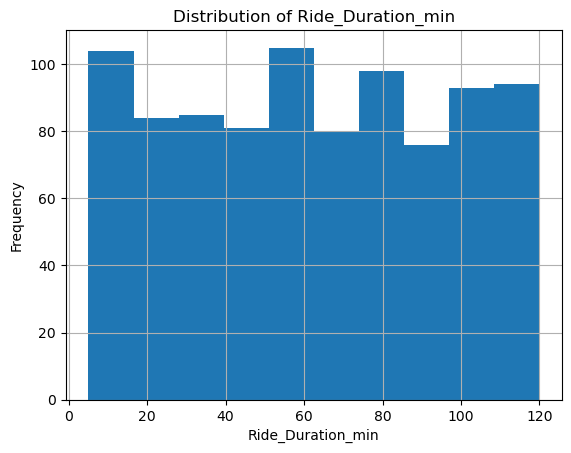

In [105]:
bikes_df['Ride_Duration_min'].hist(bins=10)
plt.title('Distribution of Ride_Duration_min')
plt.xlabel('Ride_Duration_min')
plt.ylabel('Frequency')
plt.show()

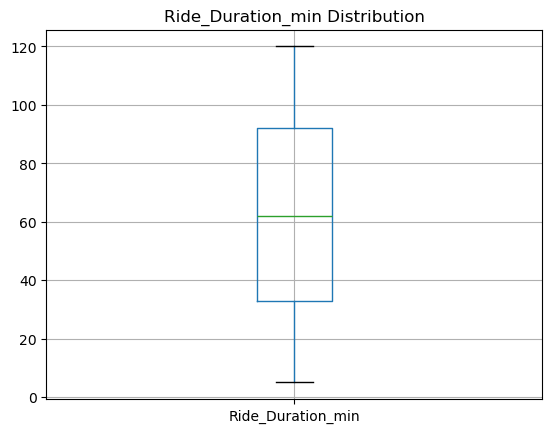

In [107]:
bikes_df.boxplot(column='Ride_Duration_min')
plt.title('Ride_Duration_min Distribution')
plt.show()

The data ranges from about 5 to 120 minutes. There are no clear outliers, but the distribution shows higher variability, indicated by a wide interquartile range (IQR). This suggests diverse ride durations. Since Ride durations vary widely (from 5 to 120 minutes) with no extreme outliers but high variability, this variation suggests different use cases like short urban commutes vs. longer recreational rides.

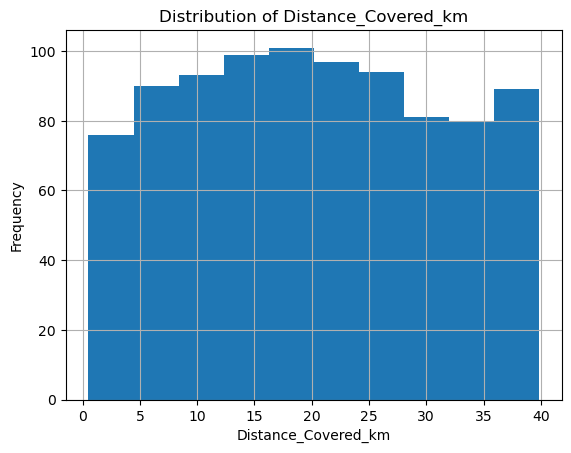

In [109]:
bikes_df['Distance_Covered_km'].hist(bins=10)
plt.title('Distribution of Distance_Covered_km')
plt.xlabel('Distance_Covered_km')
plt.ylabel('Frequency')
plt.show()

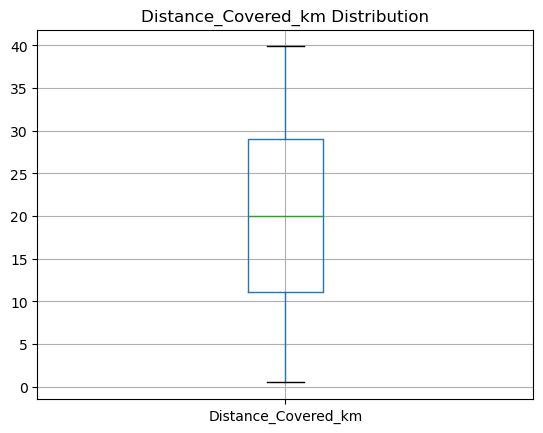

In [111]:
bikes_df.boxplot(column='Distance_Covered_km')
plt.title('Distance_Covered_km Distribution')
plt.show()

The data ranges from approximately 0.5 to 39.87 km. No significant outliers are observed, and the values appear more clustered compared to Ride Duration. Thus, since it seems like most rides cover shorter distances (~10–30 km), bikes are likely used for intra-city travel rather than long-distance touring. Hence, the firm could invest in more standard bikes (vs. mountain or electric) as they might be a better suit for the majority of trips.Similarly, for longer distances, the company could promote electric bikes to attract environmentally conscious users.

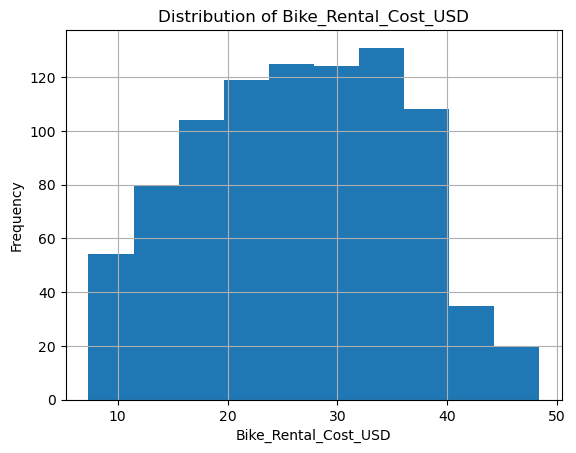

In [113]:
bikes_df['Bike_Rental_Cost_USD'].hist(bins=10)
plt.title('Distribution of Bike_Rental_Cost_USD')
plt.xlabel('Bike_Rental_Cost_USD')
plt.ylabel('Frequency')
plt.show()

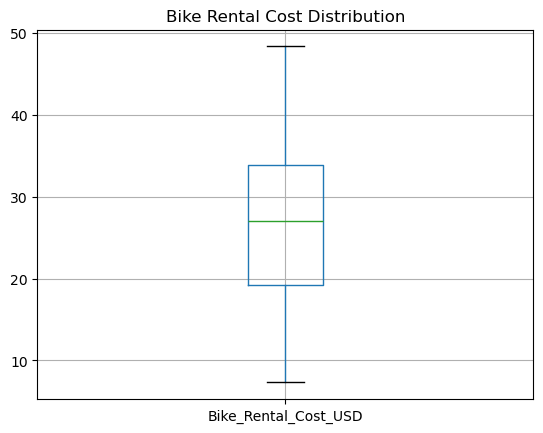

In [115]:
bikes_df.boxplot(column='Bike_Rental_Cost_USD')
plt.title('Bike Rental Cost Distribution')
plt.show()

The data ranges from around 7.3 USD to 48.38 USD with no obvious outliers being observed, and the distribution appears relatively uniform with a moderate spread. Hence, since rental costs range between 7.3 USD and 48.38 USD, with no extreme outliers, the pricing structure seems reasonable and does not appear to deter customers, as no anomalies in cost are observed.

Later, it will be interesting to check if tiered pricing strategies could be introduced based on bike types (standard vs. premium electric bikes) to capture varying willingness to pay. Also, it will be necessary to study the rider satisfaction against price to evaluate whether pricing adjustments are needed to improve customer satisfaction.

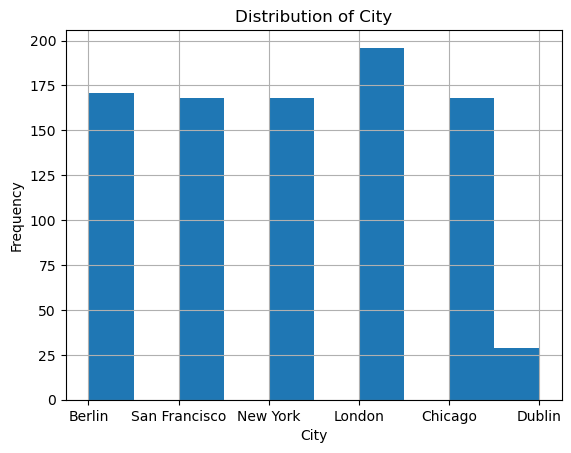

In [117]:
bikes_df['City'].hist(bins=10)
plt.title('Distribution of City')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

In [119]:
print(bikes_df['City'].value_counts())

City
London           196
Berlin           171
San Francisco    168
New York         168
Chicago          168
Dublin            29
Name: count, dtype: int64


Majority of rides occur in London, Berlin, San Francisco, New York, and Chicago, which have similar frequencies (~160–196) while Dublin has significantly fewer rentals (29) compared to other cities. Thus, the firm should focus on maintaining larger bike fleets in high-demand cities (London, Berlin, etc) to meet customer demand. 

Also, Dublin's low frequency could suggest a smaller market, possibly due to population size or bike demand. This presents opportunities as the firm should assess its marketing efforts in Dublin or consider reallocating bikes to higher-demand cities.

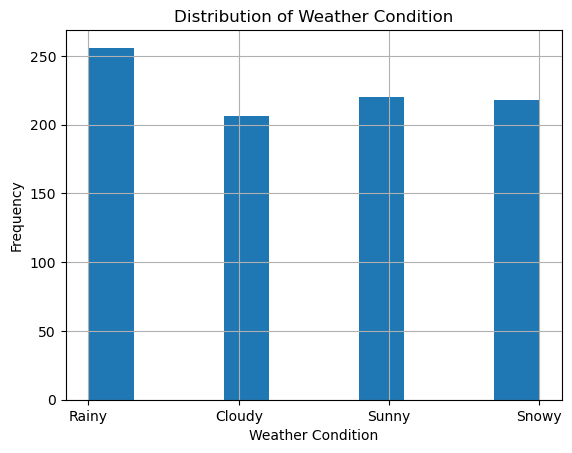

In [121]:
bikes_df['Weather Condition'].hist(bins=10)
plt.title('Distribution of Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.show()

In [123]:
print(bikes_df['Weather Condition'].value_counts())

Weather Condition
Rainy     256
Sunny     220
Snowy     218
Cloudy    206
Name: count, dtype: int64


Rainy (256), Sunny (220), Snowy (218), Cloudy (186). Thus weather conditions are fairly balanced, with Rainy weather being most frequent (256) and Cloudy the least (186). This way, high rentals during Rainy and Snowy conditions suggest all-weather reliability of bikes. Given this, the main recommendation is to stock weather-resistant bikes (e.g., Mountain bikes) in areas with frequent rainfall.

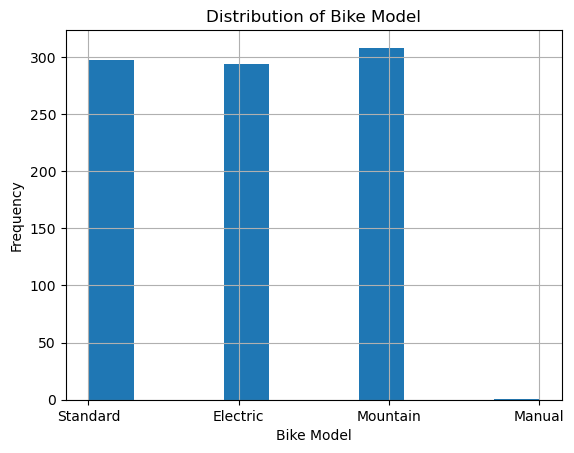

In [125]:
bikes_df['Bike Model'].hist(bins=10)
plt.title('Distribution of Bike Model')
plt.xlabel('Bike Model')
plt.ylabel('Frequency')
plt.show()

In [127]:
print(bikes_df['Bike Model'].value_counts())

Bike Model
Mountain    308
Standard    297
Electric    294
Manual        1
Name: count, dtype: int64


Mountain (308), Standard (297), Electric (294), Manual (1). Thus, the distribution is well-balanced among Mountain, Standard, and Electric bikes, but the Manual bike (1) appears as an outlier.

This balanced demand suggests that customers have varied preferences, possibly based on terrain or ride length.

The Manual bike (1) could be either a data entry error that needs verification or an experimental model that isn’t yet adopted widely.Thus, the main recommendations are to focus marketing efforts on Electric and Mountain bikes, as they may cater to specific groups (e.g., commuters vs. adventure riders).Also, investigate whether the Manual bike needs removal from the dataset or if it represents a pilot program for new offerings.

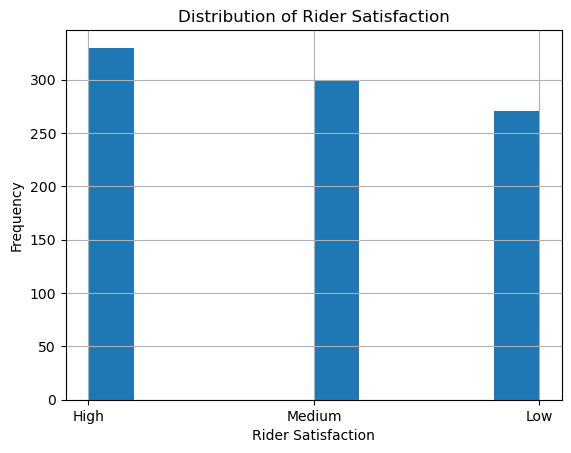

In [129]:
bikes_df['Rider Satisfaction'].hist(bins=10)
plt.title('Distribution of Rider Satisfaction')
plt.xlabel('Rider Satisfaction')
plt.ylabel('Frequency')
plt.show()

In [131]:
print(bikes_df['Rider Satisfaction'].value_counts())

Rider Satisfaction
High      330
Medium    299
Low       271
Name: count, dtype: int64


High (330), Medium (299), Low (271). Thus, rider satisfaction levels are fairly distributed, with a slight lean toward high satisfaction (330).

Positive feedback suggests that the majority of customers are satisfied with services. However, Low satisfaction (271) is still notable and requires investigation. 

In [135]:
bikes_numerical_df = bikes_df.select_dtypes(include=['int32', 'float64'])
print(bikes_numerical_df)

     Rider Age  Ride_Duration_min  Distance_Covered_km  Bike_Rental_Cost_USD
0           53                 62                 2.25                 22.63
1           39                  5                21.67                  7.87
2           43                106                28.40                 39.40
3           24                119                 5.66                 37.63
4           24                 11                25.74                 13.12
..         ...                ...                  ...                   ...
895         55                 55                28.35                 26.30
896         47                 14                11.99                 13.78
897         49                 23                 2.78                 20.47
898         19                110                 2.27                 39.62
899         37                 17                 9.70                 13.02

[900 rows x 4 columns]


In [137]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [139]:
Q1 = bikes_numerical_df.quantile(0.25)
Q3 = bikes_numerical_df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Rider Age               21.0000
Ride_Duration_min       59.0000
Distance_Covered_km     17.9875
Bike_Rental_Cost_USD    14.6525
dtype: float64


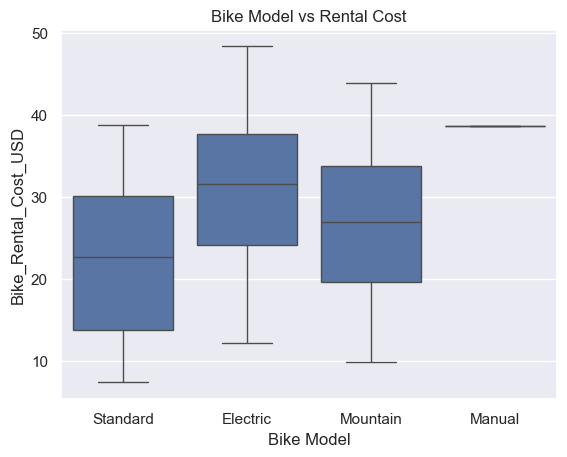

In [142]:
sns.boxplot(x='Bike Model', y='Bike_Rental_Cost_USD', data=bikes_df)
plt.title('Bike Model vs Rental Cost')
plt.show()

It seems that Electric bikes have the most premium offering after Manual, which is either a premium new pilot offering or an outlier. This will have to be consuted with the product management team. 

Standard bike model is the most economic option for customers. 

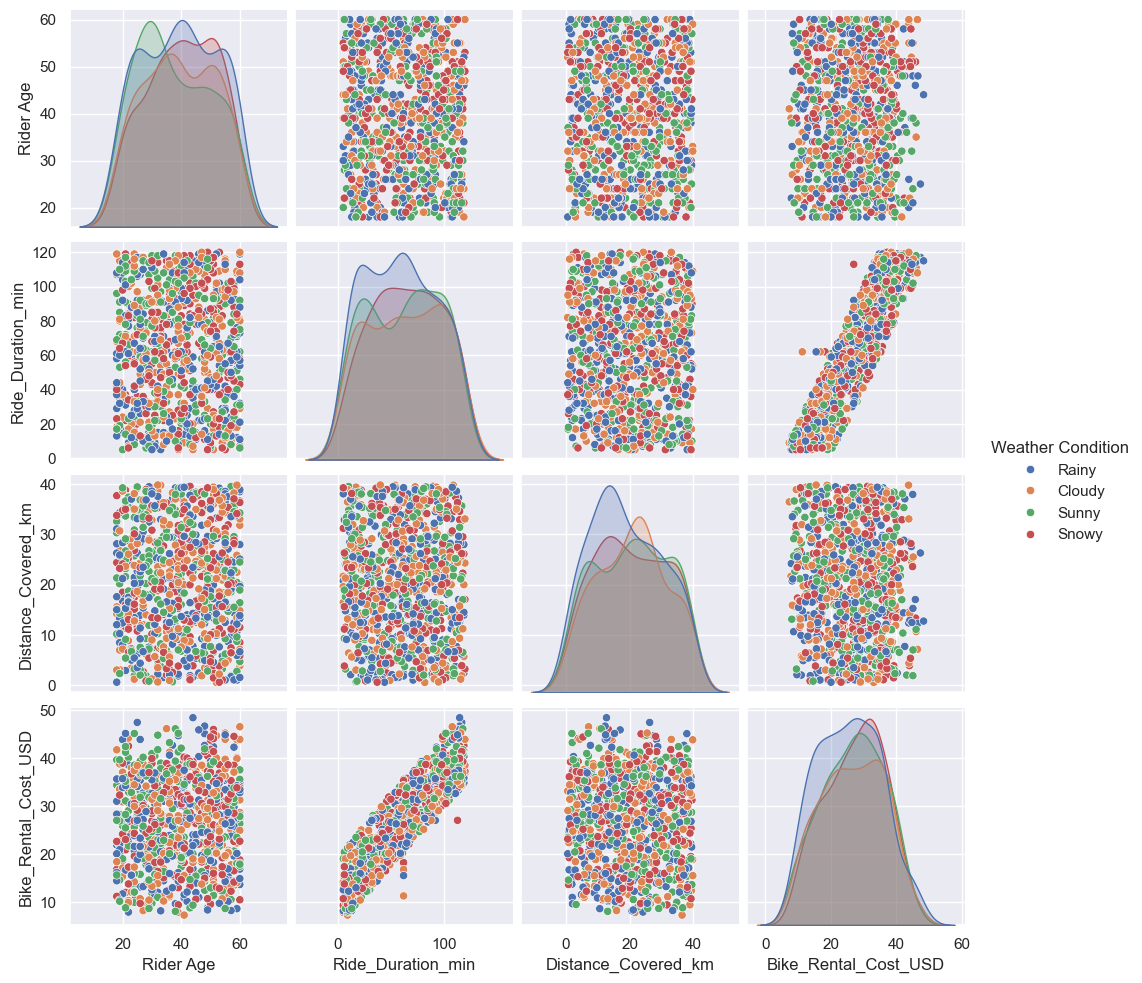

In [144]:
sns.pairplot(bikes_df, hue='Weather Condition')
plt.show()

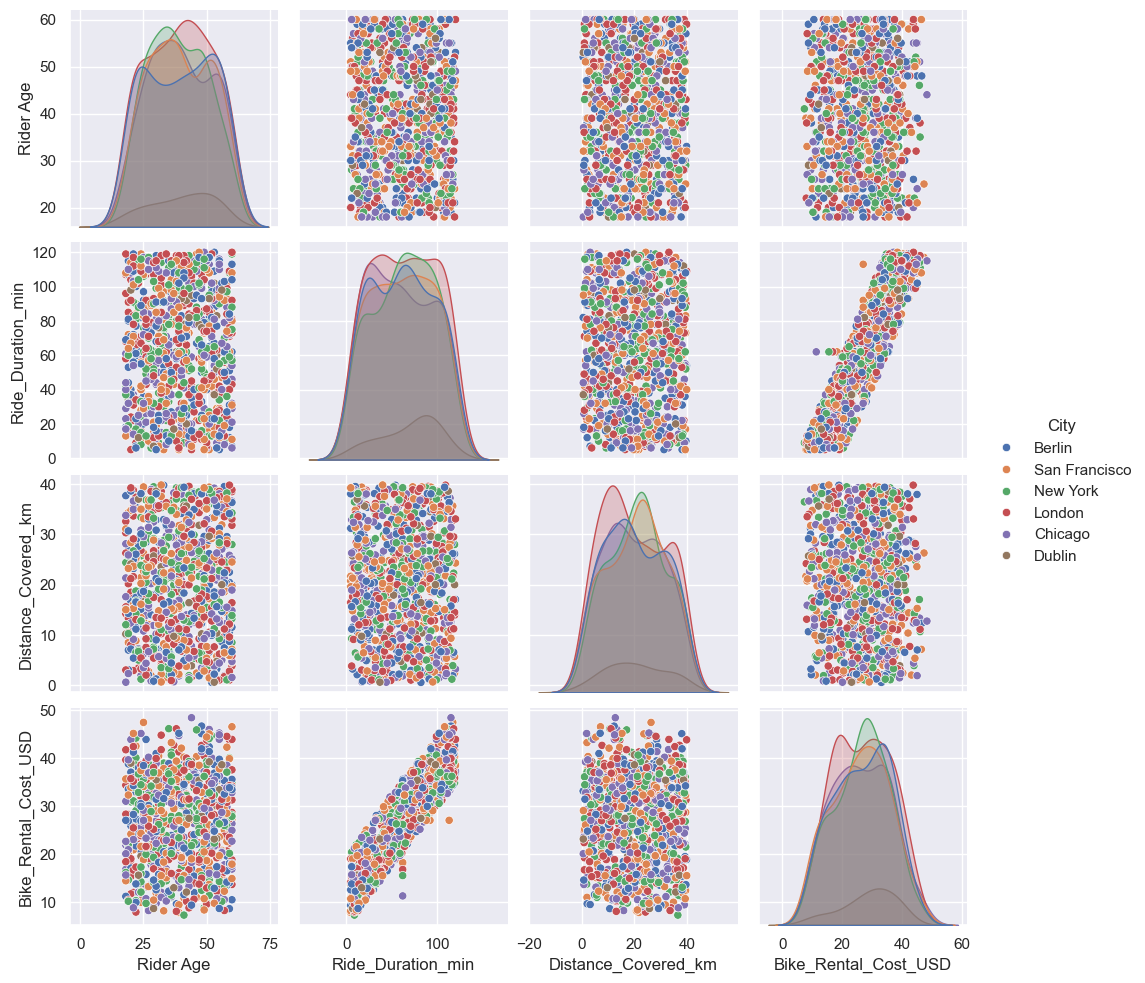

In [146]:
sns.pairplot(bikes_df, hue='City')
plt.show()

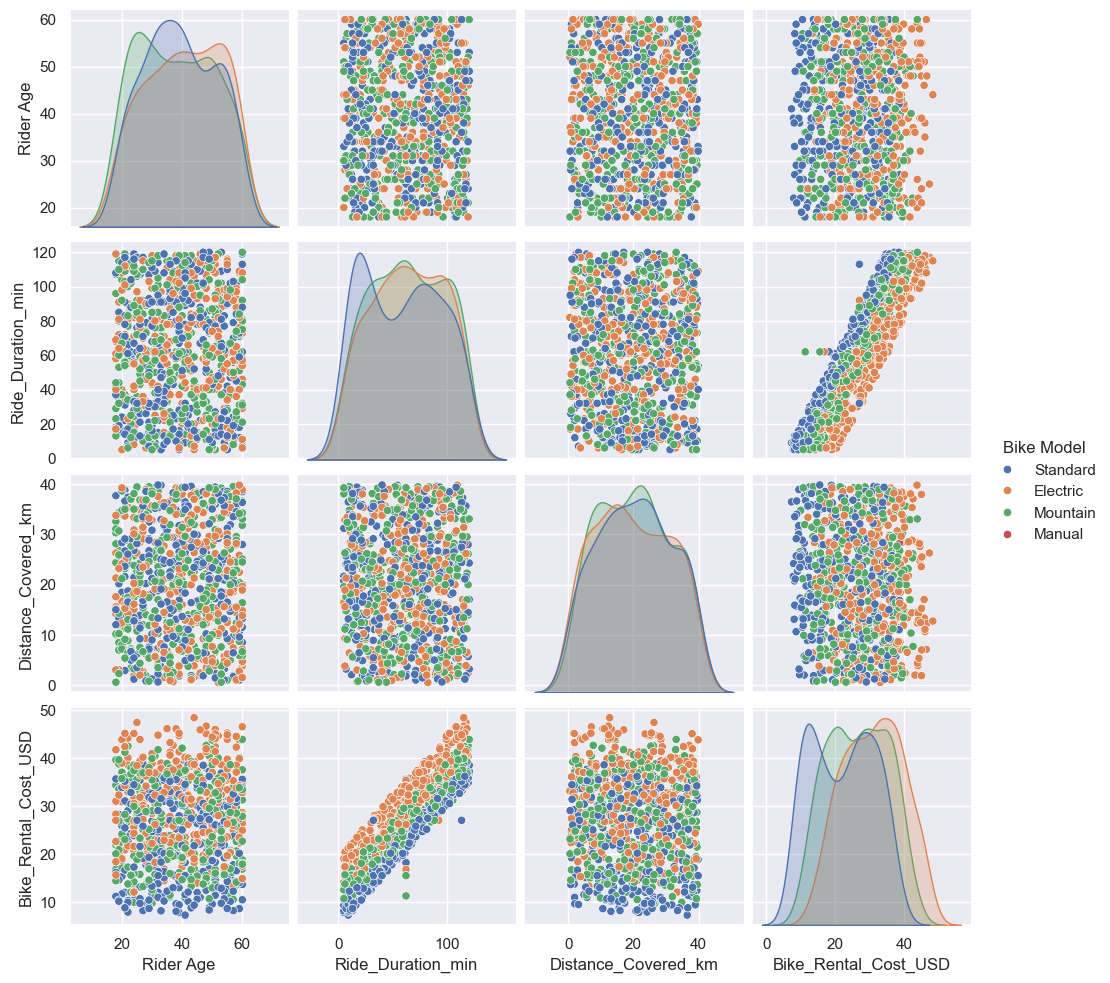

In [148]:
sns.pairplot(bikes_df, hue='Bike Model')
plt.show()

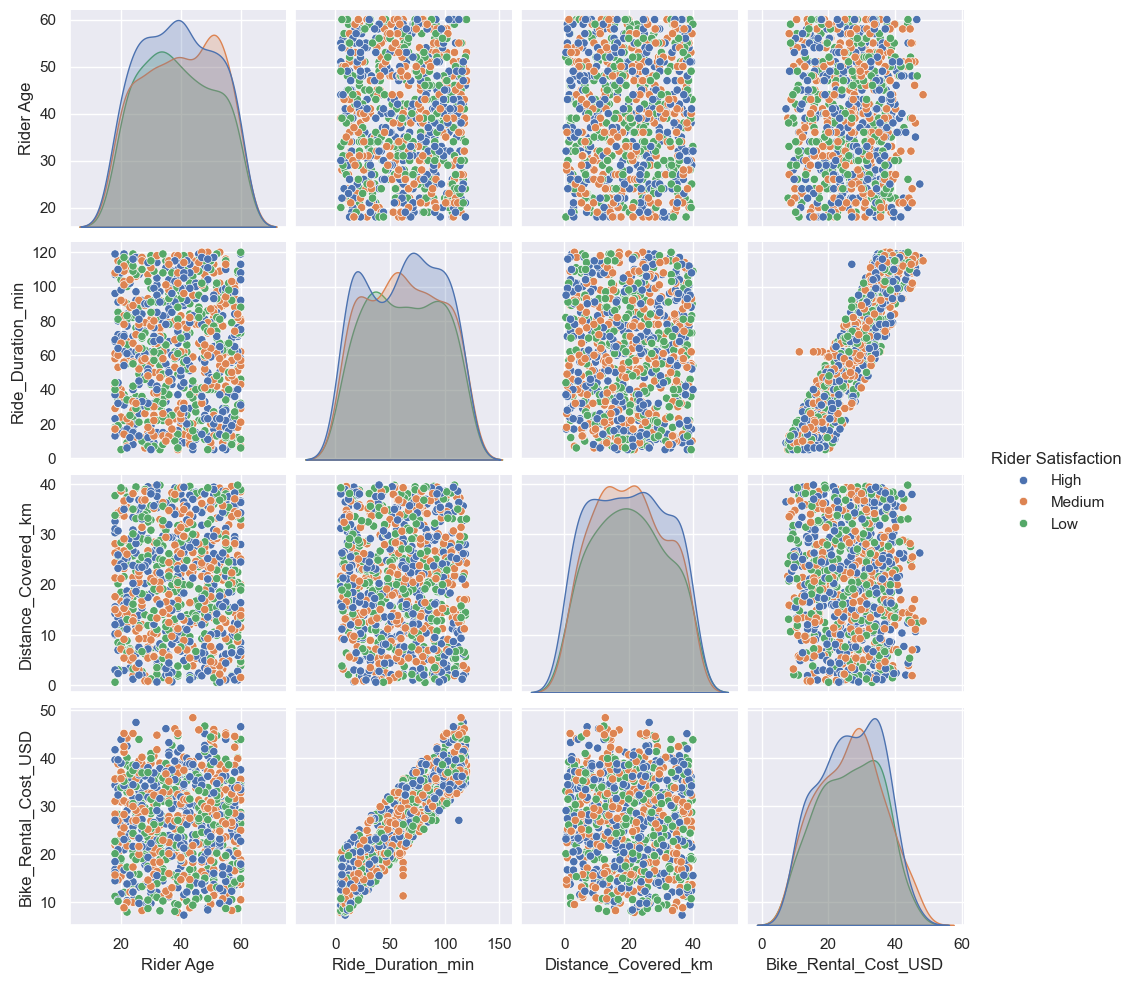

In [150]:
sns.pairplot(bikes_df, hue='Rider Satisfaction')
plt.show()

Each pairplot shows how the chosen hue, that is, categorical variable (Weather Condition, City, Bike Model, and Rider Satisfaction) relates to the four main numeric variables (Rider Age, Ride_Duration_min, Distance_Covered_km, and Bike_Rental_Cost_USD). 

**Weather Condition**
It seems that Ride Duration & Distance tend to be slightly shorter on Snowy or Rainy days, while Sunny and Cloudy conditions show more spread toward longer rides. Rental Cost also appears slightly higher in better weather (Sunny), though the distributions overlap considerably. Rider Age is broadly similar across all weather types, with no extreme age skew.

**Business Recommendation**
Shorter rides occur in unfavorable weather (rain, snow), so the firm could introduce weather-based discounts or incentives to encourage continued rentals and maintain ridership on bad-weather days.

**City**
Different cities show small shifts in Rider Age distributions (some leaning a bit older or younger) like New York which shows younger customers. Also, there are visible differences in Ride Duration and Distance among cities (e.g., some cities have a higher proportion of long-duration rides like London). Bike Rental Cost overlaps heavily but certain cities skew higher (e.g London), suggesting local pricing differences or rider behavior patterns.

**Business Recommendation**
Cities show distinct ride cost and duration patterns. So, the firm could tailor pricing strategies and localized marketing campaigns to reflect local demand, typical trip durations, and cost tolerance in each city.

**Bike Model**
It seems that Electric and Mountain bikes tend to be used for longer rides and cover greater distances, with higher average rental costs (especially electric). Standard and Manual bikes cluster more heavily at lower or moderate cost levels and often shorter trips. Rider Age doesn’t vary extensively by bike type, though there are small shifts (e.g., a slight preference for electric among older riders).

**Business Recommendation**
Electric and mountain bikes fetch higher rental rates and appeal to longer-distance riders. Thus, the firm could consider expanding the electric fleet and ensuring mountain bikes are available where terrain and rider demand align, to capture premium revenue.

**Rider Satisfaction**
It appears that High-satisfaction riders often appear in slightly longer ride durations and cover somewhat greater distances than low-satisfaction riders. The Bike Rental Cost distribution for high- vs. low-satisfaction riders overlaps, but high satisfaction can coincide with moderate to higher costs (perhaps better bikes or more enjoyable trips). Rider Age differences among satisfaction levels are subtle, with a small tendency for high-satisfaction riders to be around middle age groups.

**Business Recommendation**
High-satisfaction users often ride longer and pay slightly more, so the firm could offer quality equipment and user-friendly experiences (e.g., easy booking, reliable bikes) to drive both revenue and loyalty.

<h2>Section 4. Statistical Analysis</h2>

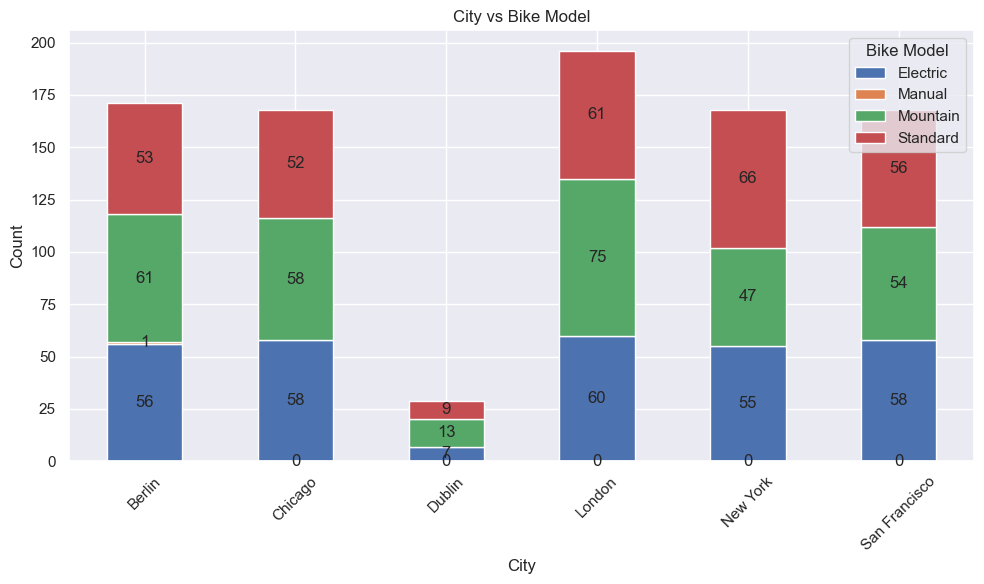

In [348]:
import matplotlib.pyplot as plt

# Creating the crosstab plot
ct = pd.crosstab(bikes_df['City'], bikes_df['Bike Model'])
ax = ct.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding title and labels
plt.title('City vs Bike Model')
plt.xlabel('City')
plt.ylabel('Count')

# Displaying values on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center')  # Displays integer values inside the bars

# Showing the plot
plt.xticks(rotation=45)  
plt.tight_layout()       
plt.show()


It seems that Mountain bikes are the preferred bike model across all cities followed by Standard and Electric bike models

In [154]:
print(bikes_df.groupby('Rider Satisfaction')['Bike_Rental_Cost_USD'].mean())

Rider Satisfaction
High      26.717909
Low       26.468155
Medium    26.547391
Name: Bike_Rental_Cost_USD, dtype: float64


It seems that Rider Satisfaction is not driven by Rental Cost

In [156]:
print(bikes_df.groupby('Weather Condition')['Bike_Rental_Cost_USD'].mean())

Weather Condition
Cloudy    26.622233
Rainy     25.673086
Snowy     27.388945
Sunny     26.818955
Name: Bike_Rental_Cost_USD, dtype: float64


It seems that Rider Satisfaction is distributed quite evenly across all Weather Conditions, with a slight positive skew towards Snowy and negative skew towards Rainy

In [158]:
print(bikes_df.groupby('Bike Model')['Bike_Rental_Cost_USD'].mean())

Bike Model
Electric    31.003367
Manual      38.710000
Mountain    26.578344
Standard    22.180539
Name: Bike_Rental_Cost_USD, dtype: float64


It seems that Rider Satisfaction has higher variability distributed across Bike Models, with a clear positive skew towards Manual (again indicating an outlier) and negative skew towards Standard. 

**Business Recommendation** would be to improve Standard Bikes service by improving their quality, pricing, or customer service.

In [160]:
print(bikes_df.groupby('City')['Bike_Rental_Cost_USD'].mean())

City
Berlin           26.772632
Chicago          26.249940
Dublin           28.738966
London           26.792500
New York         26.524167
San Francisco    26.181667
Name: Bike_Rental_Cost_USD, dtype: float64


It seems that Rider Satisfaction is distributed quite evenly across all Cities, with a stronger positive skew towards Dublin and slight negative skew towards San Francisco

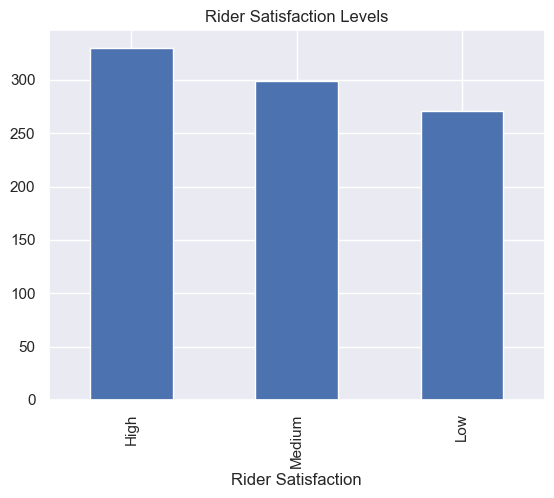

In [162]:
bikes_df['Rider Satisfaction'].value_counts().plot(kind='bar')
plt.title('Rider Satisfaction Levels')
plt.show()

In [164]:
plt.figure(figsize=(20,10))
c= bikes_numerical_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Rider Age  Ride_Duration_min  Distance_Covered_km  \
Rider Age              1.000000          -0.009412             0.008413   
Ride_Duration_min     -0.009412           1.000000            -0.011995   
Distance_Covered_km    0.008413          -0.011995             1.000000   
Bike_Rental_Cost_USD   0.010200           0.905083            -0.033787   

                      Bike_Rental_Cost_USD  
Rider Age                         0.010200  
Ride_Duration_min                 0.905083  
Distance_Covered_km              -0.033787  
Bike_Rental_Cost_USD              1.000000

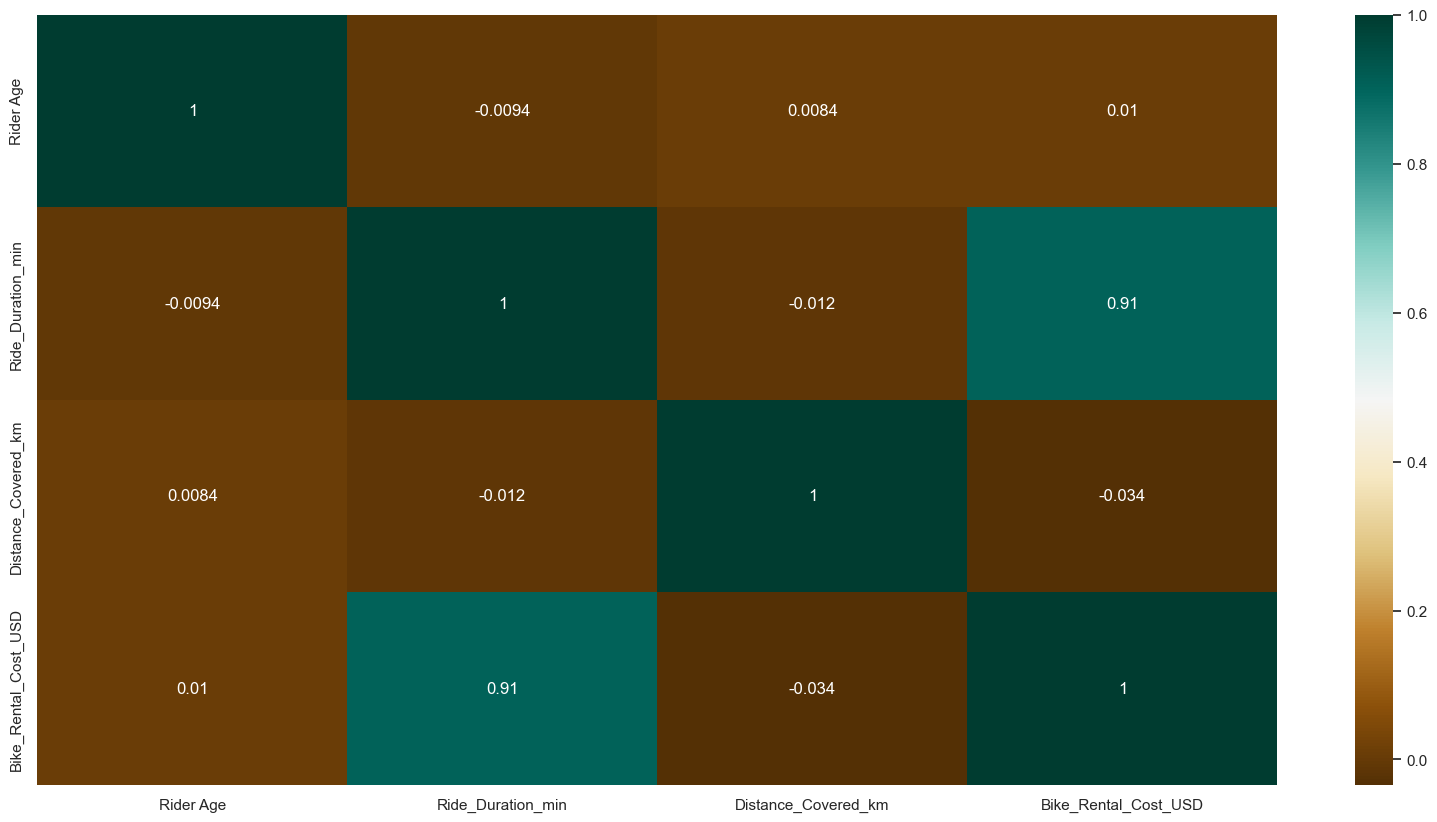

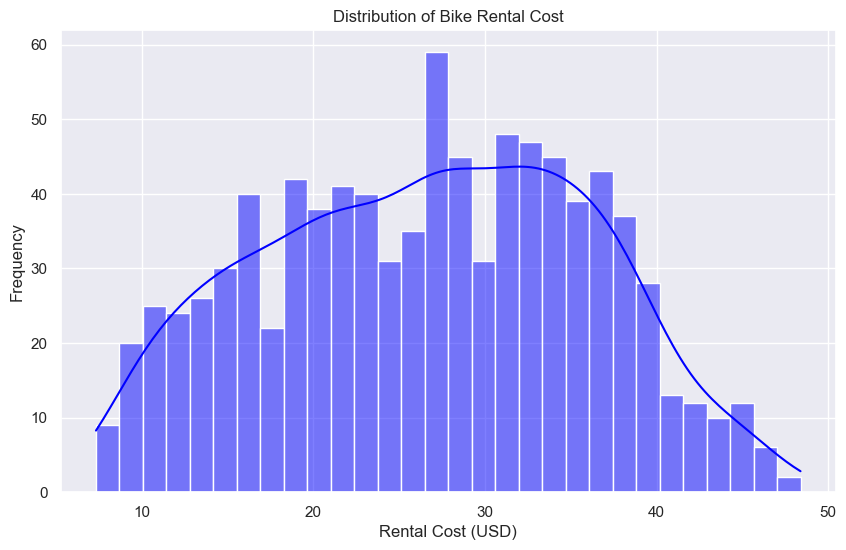

In [166]:
# 1. Histogram - Distribution of Rental Cost
plt.figure(figsize=(10, 6))
sns.histplot(bikes_df['Bike_Rental_Cost_USD'], bins=30, kde=True, color='blue')
plt.title('Distribution of Bike Rental Cost')
plt.xlabel('Rental Cost (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

As observed Rental costs range between 7 USD and 48 USD.The distribution is slightly right-skewed, indicating more rentals in the mid-range (20 USD – 35 USD) but fewer high-cost rentals. The smooth KDE curve suggests a continuous trend with no abrupt pricing gaps.

**Business Insight**
The mid-range pricing (20 USD – 35 USD) dominates, likely reflecting standard pricing models for short to medium rides. The long tail of high-cost rentals may correspond to longer rides, possibly involving electric or mountain bikes.

**Business Recommendation**:
The firm could offer discounts for high-cost rides to encourage long-distance usage. Also, it could analyze whether pricing adjustments could better capture high-paying customers and evaluate whether premium pricing for Electric and Mountain bikes aligns with customer demand.

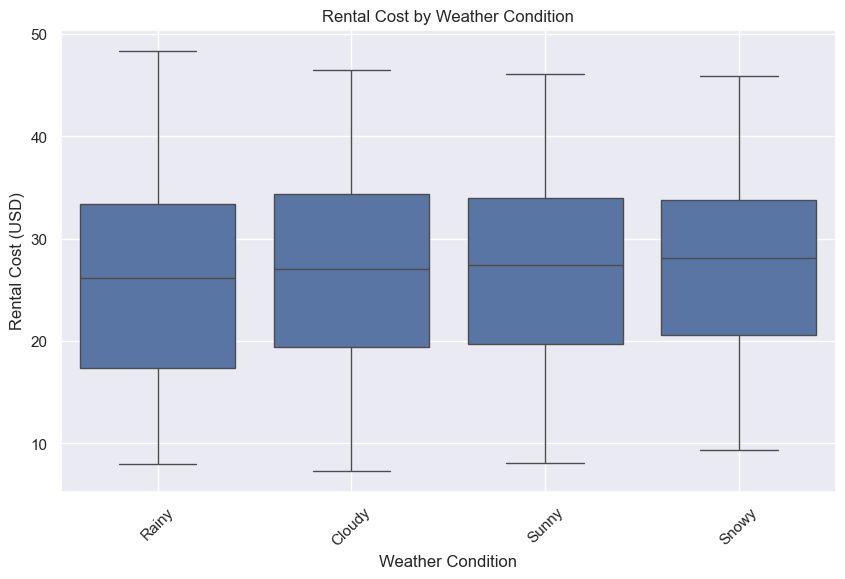

In [172]:
# 3. Boxplot - Rental Cost by Weather Condition
plt.figure(figsize=(10, 6))
sns.boxplot(data=bikes_df, x='Weather Condition', y='Bike_Rental_Cost_USD')
plt.title('Rental Cost by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Rental Cost (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

It seems that we have similar median rental costs (~$27) across all weather conditions. Thus, cost distribution spreads are nearly identical, **implying that weather does not significantly impact rental pricing**. There are no significant outliers related to specific weather conditions.

**Business Insight**
It appears that rentals occur consistently across all weather types, which indicates weather resilience of the service. Customers likely plan trips regardless of weather, especially in cities accustomed to rain or snow.

**Business Recommendation**
The firm could consider seasonal promotions (e.g., rain gear add-ons or snow-friendly bikes) to boost rentals during adverse weather. The company could also introduce dynamic pricing models for weather-sensitive customers to incentivize off-peak bookings and invest in weather-resistant equipment to maintain customer satisfaction in challenging conditions.

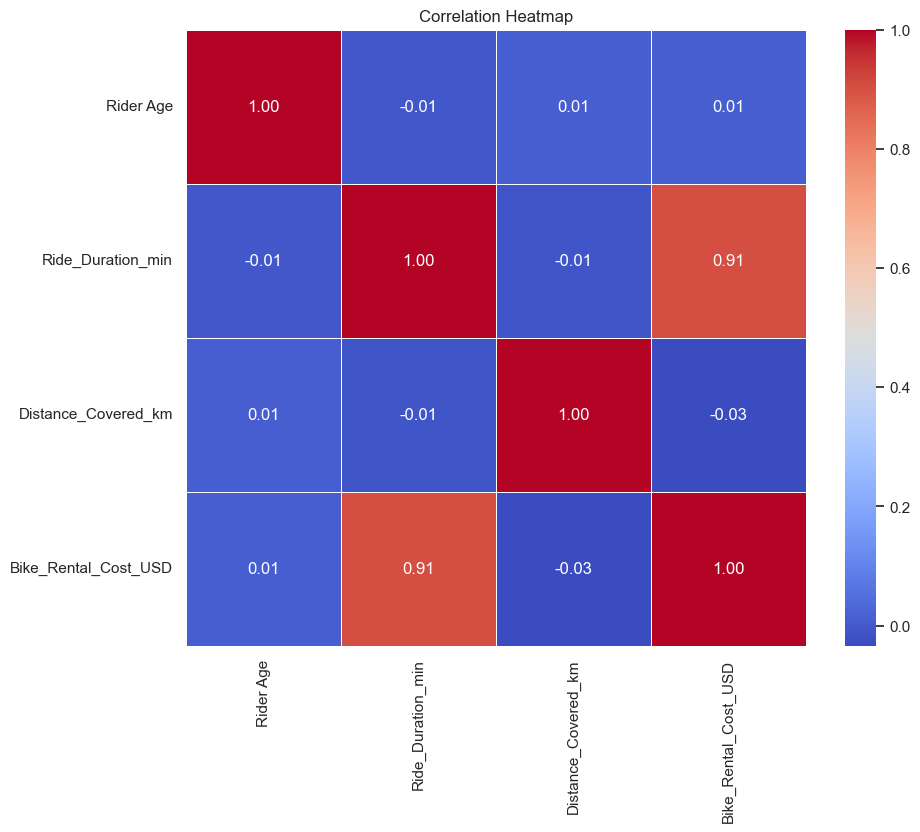

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical features for correlation analysis
numerical_df = bikes_df.select_dtypes(include=['number'])

# Getting correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Strong positive correlation is observed (0.91) between Ride Duration and Bike Rental Cost. Thus, longer rides could be associated with higher rental costs, indicating a time-based pricing model.

For Distance Covered vs Other Variables (~0.01 to -0.03), weak correlations with all variables is observed, including Bike Rental Cost (-0.03).
This suggests that pricing is not distance-dependent, indicating a possible flat-rate model or inclusion of other factors like bike type.

For Rider Age vs all Variables (~0.01 to -0.01), no significant correlation between age and other variables is observed, suggesting that age does not influence ride duration, distance, or rental cost, supporting age-neutral marketing strategies.

Strong correlation between Ride Duration and Cost confirms a time-dependent pricing model. **Also the lack of correlation between Distance Covered and Rental Cost could indicate a missed opportunity to incorporate distance-based pricing.**


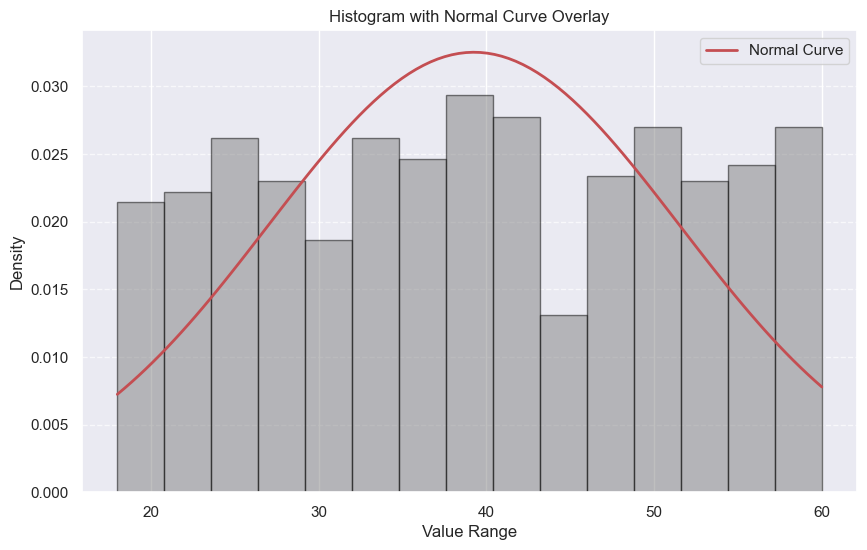

In [361]:
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(bikes_df['Rider Age'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First we calculate the normal distribution parameters 
mu, std = stats.norm.fit(bikes_df['Rider Age'])

# Then, we create a range of x values for the normal curve
x = np.linspace(min(bikes_df['Rider Age']), max(bikes_df['Rider Age']), 100)

# Also, create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

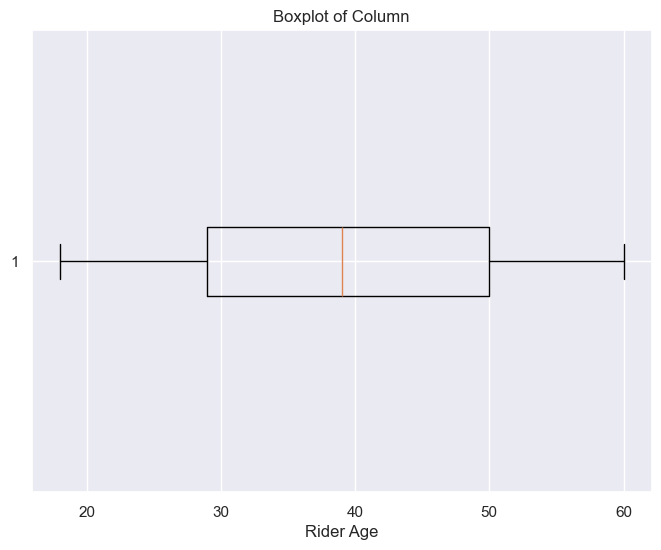

In [369]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(bikes_df['Rider Age'],vert=False)
plt.title('Boxplot of Column')
plt.xlabel('Rider Age')
plt.grid(True)
plt.show()

As can be seen in the data visualization, Rider Age variable appears to have a slight positive skew as mean is slightly higher than the median

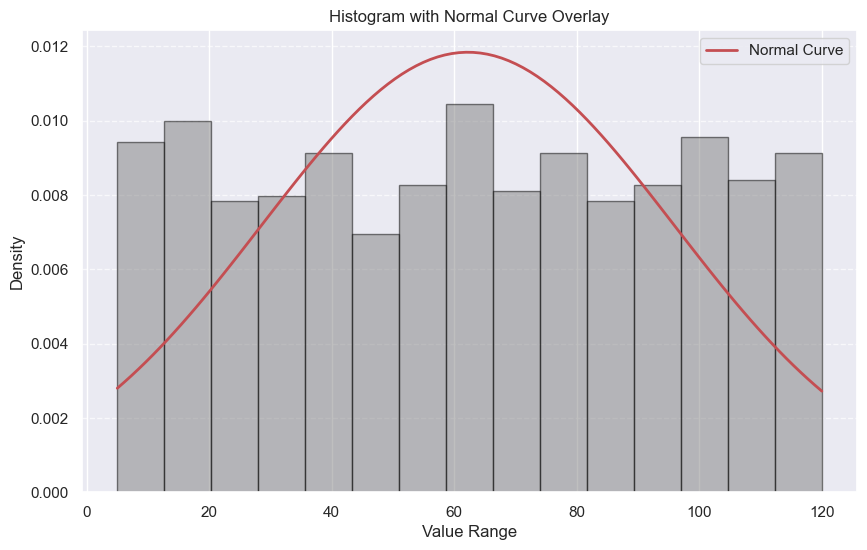

In [363]:
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(bikes_df['Ride_Duration_min'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First we calculate the normal distribution parameters 
mu, std = stats.norm.fit(bikes_df['Ride_Duration_min'])

# Then, we create a range of x values for the normal curve
x = np.linspace(min(bikes_df['Ride_Duration_min']), max(bikes_df['Ride_Duration_min']), 100)

# Also, create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

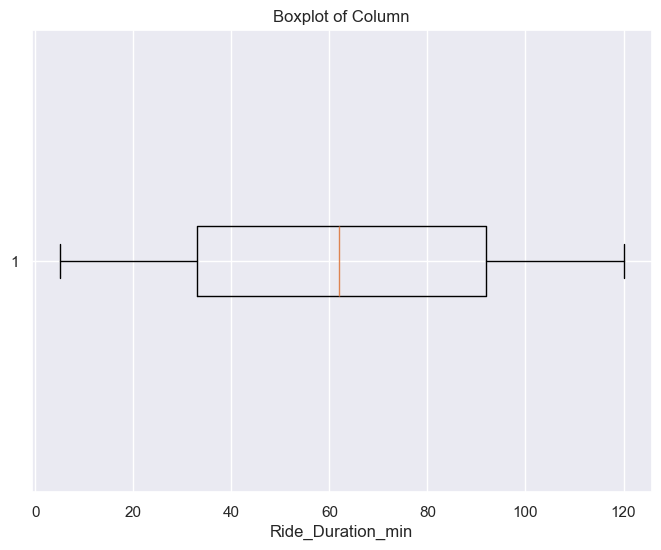

In [375]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(bikes_df['Ride_Duration_min'],vert=False)
plt.title('Boxplot of Column')
plt.xlabel('Ride_Duration_min')
plt.grid(True)
plt.show()

As can be seen in the data visualization, Ride_Duration_min variable appears to have a slight positive skew as mean is slightly higher than the median

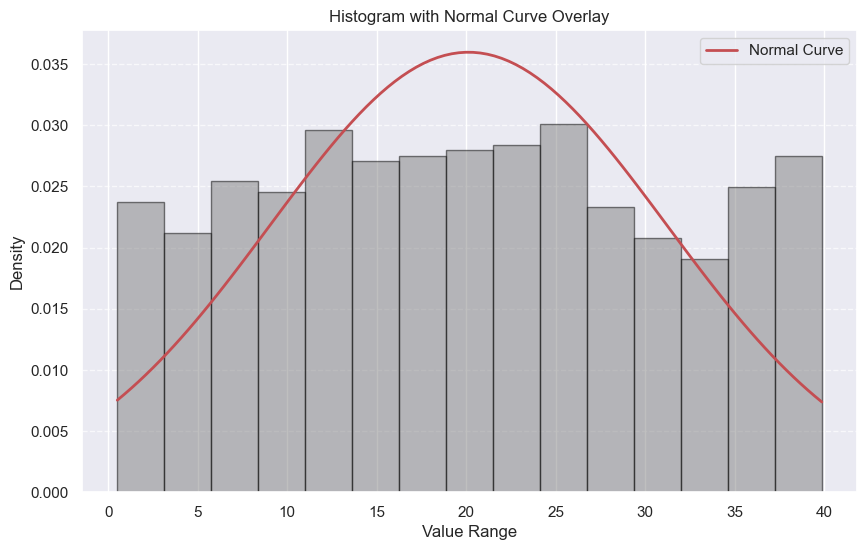

In [365]:
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(bikes_df['Distance_Covered_km'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First we calculate the normal distribution parameters 
mu, std = stats.norm.fit(bikes_df['Distance_Covered_km'])

# Then, we create a range of x values for the normal curve
x = np.linspace(min(bikes_df['Distance_Covered_km']), max(bikes_df['Distance_Covered_km']), 100)

# Also, create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

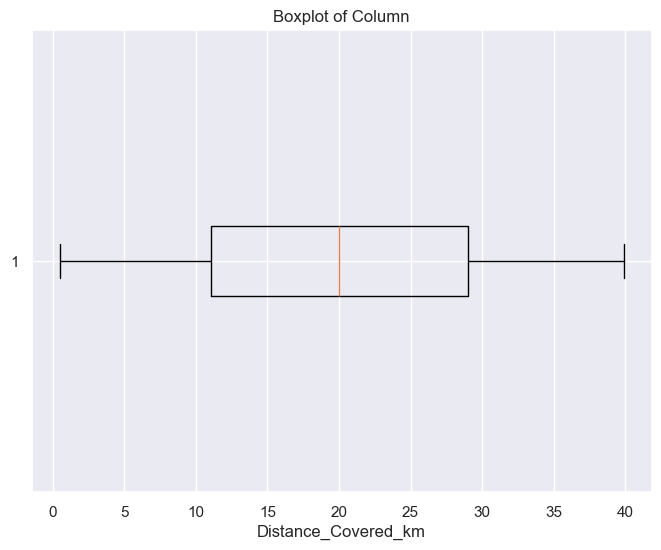

In [373]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(bikes_df['Distance_Covered_km'],vert=False)
plt.title('Boxplot of Column')
plt.xlabel('Distance_Covered_km')
plt.grid(True)
plt.show()

As can be seen in the data visualization, Distance_Covered_km variable also appears to have a slight positive skew as mean is slightly higher than the median

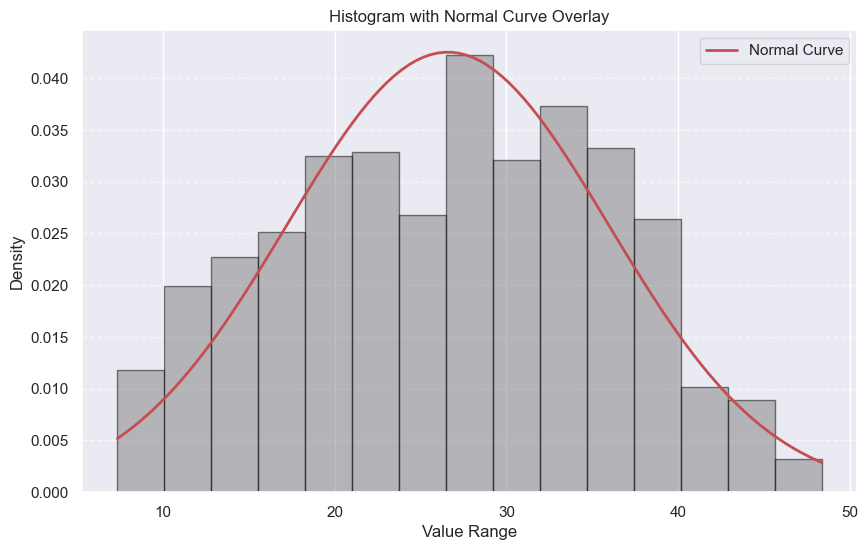

In [367]:
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(bikes_df['Bike_Rental_Cost_USD'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First we calculate the normal distribution parameters 
mu, std = stats.norm.fit(bikes_df['Bike_Rental_Cost_USD'])

# Then, we create a range of x values for the normal curve
x = np.linspace(min(bikes_df['Bike_Rental_Cost_USD']), max(bikes_df['Bike_Rental_Cost_USD']), 100)

# Also, create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

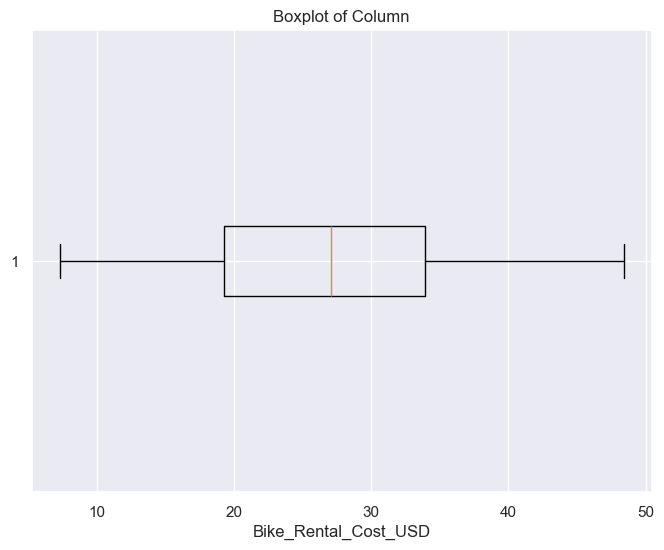

In [377]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(bikes_df['Bike_Rental_Cost_USD'],vert=False)
plt.title('Boxplot of Column')
plt.xlabel('Bike_Rental_Cost_USD')
plt.grid(True)
plt.show()

As can be seen in the data visualization, Bike_Rental_Cost_USD variable appears to have a slight negative skew as mean is slightly lower than the median

**Now, I will encode categorical features before studying their correlation**

<h2>Section 5. Encoding and Scaling</h2>

*For encoding, One-Hot Encoding will be used for nominal variables (City, Weather Condition, Bike Model) and Ordinal Encoding for ordered variables (Rider Satisfaction)*

In [250]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from scipy.stats import chi2_contingency, f_oneway

In [252]:
# 1. One-Hot Encoding for Nominal Variables
nominal_features = ['City', 'Weather Condition', 'Bike Model']
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
encoded_nominal = one_hot_encoder.fit_transform(bikes_df[nominal_features])
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=one_hot_encoder.get_feature_names_out(nominal_features))

# 2. Ordinal Encoding for Ordered Variables
ordinal_features = ['Rider Satisfaction']
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
encoded_ordinal = ordinal_encoder.fit_transform(bikes_df[ordinal_features])
encoded_ordinal_df = pd.DataFrame(encoded_ordinal, columns=ordinal_features)

# Combine Encoded Features with Numerical Data
bikes_encoded = pd.concat([bikes_df.drop(nominal_features + ordinal_features, axis=1),
                           encoded_nominal_df, encoded_ordinal_df], axis=1)

# Store 
bikes_final_df = bikes_encoded.copy()

Encoding ensures that categorical variables like City and Bike Model can be used in ML algorithms.Scaling aligns numerical values, reducing bias from features with larger magnitudes like Distance Covered vs Age. This step prepares the dataset for advanced modeling techniques such as linear regression, clustering, or decision trees. 

Ordinal Encoding converts categories into integer values (0, 1, 2...) and so is best suited for ordinal data, that is, where order matters. In this case for Rider Satisfaction (Low < Medium < High). Coversely, One-Hot encoding creates binary columns (0 or 1) for each category and is best suited for nominal data, that is, where order does not matter. Thus, in this case for the remaining City, Weather Condition and Bike Model features.

<h2>Section 6. Statistical Testing</h2>

In this section, both correlation between categorical variables and numerical variables will be assessed

**a) Correlation between categorical features**

In [255]:
# 1. Cramér’s V for Categorical-Categorical Correlations
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Cramér’s V between 'City' and 'Weather Condition'
result_cramers_v = cramers_v(bikes_df['City'], bikes_df['Weather Condition'])
print(f"Cramér's V (City vs Weather Condition): {result_cramers_v}")

Cramér's V (City vs Weather Condition): 0.0


Surprisingly, no association is seen between City and Weather Condition, implying that weather patterns are evenly distributed across cities. This means that fleet planning and weather-related promotions can be applied uniformly.

In [188]:
# 1. Cramér’s V for Categorical-Categorical Correlations
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Cramér’s V between 'City' and 'Bike Model'
result_cramers_v = cramers_v(bikes_df['City'], bikes_df['Bike Model'])
print(f"Cramér's V (City vs Bike Model): {result_cramers_v}")

Cramér's V (City vs Bike Model): 0.0


Likewise, no association between City and Bike Model features is observed using Cramer's V technique

In [190]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(bikes_df['City'], bikes_df['Rider Satisfaction'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2={chi2}, p-value={p}")

if p < 0.05:
    print("Variables are dependent (significant association).")
else:
    print("Variables are independent (no significant association).")

Chi-Square Test: chi2=5.783441856503389, p-value=0.8331174450889574
Variables are independent (no significant association).


Using a different technique, chi-square test, we also see no association between City and Rider Satisfaction

In [192]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(bikes_df['Bike Model'], bikes_df['Rider Satisfaction'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2={chi2}, p-value={p}")

if p < 0.05:
    print("Variables are dependent (significant association).")
else:
    print("Variables are independent (no significant association).")

Chi-Square Test: chi2=5.2971462686511, p-value=0.506305029821833
Variables are independent (no significant association).


Likewise, using chi-square test, we again see no association between Bike Model and Rider Satisfaction

In [194]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(bikes_df['Weather Condition'], bikes_df['Rider Satisfaction'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2={chi2}, p-value={p}")

if p < 0.05:
    print("Variables are dependent (significant association).")
else:
    print("Variables are independent (no significant association).")

Chi-Square Test: chi2=10.171123521945002, p-value=0.1176281600133229
Variables are independent (no significant association).


Chi-Square checks whether two categorical variables are independent or associated. I have used it to complement it with Cramér’s V as the results were slightly unexpected. Nevertheless, it also confirms no significant association.

**b) Correlation between numerical features**

In [196]:
#ANOVA for Categorical-Numerical Relationships
groups = [bikes_df['Bike_Rental_Cost_USD'][bikes_df['Weather Condition'] == category] for category in bikes_df['Weather Condition'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA (Weather Condition vs Bike Rental Cost): F-stat={f_stat}, P-value={p_value}")

# Final Output Check
print("Encoding and Correlation Analysis Completed!")

ANOVA (Weather Condition vs Bike Rental Cost): F-stat=1.3855746624156198, P-value=0.2457745307192601
Encoding and Correlation Analysis Completed!


F-statistic = 1.39, P-value = 0.246.
P-value > 0.05 indicates no statistically significant impact of Weather Condition on Rental Cost.Thus, pricing appears weather-neutral, suggesting the current pricing model works well across all weather conditions.
The opportunities for business here would be to introduce dynamic pricing during adverse weather to encourage rentals and also offer weather-specific add-ons like rain gear to boost perceived value.

In [199]:
#ANOVA for Categorical-Numerical Relationships
groups = [bikes_df['Bike_Rental_Cost_USD'][bikes_df['Bike Model'] == category] for category in bikes_df['Bike Model'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA (Bike Model vs Bike Rental Cost): F-stat={f_stat}, P-value={p_value}")

# Final Output Check
print("Encoding and Correlation Analysis Completed!")

ANOVA (Bike Model vs Bike Rental Cost): F-stat=51.43620642637523, P-value=1.1188692627478988e-30
Encoding and Correlation Analysis Completed!


ANOVA: Bike Model vs Bike Rental Cost
F-statistic = 51.44, P-value = 1.12e-30 (very close to 0)

Strong evidence of a statistically significant relationship between Bike Model and Rental Cost.The low p-value (< 0.05) indicates that Bike Model types (Standard, Mountain, Electric, Manual) lead to significantly different rental costs. Thus, pricing strategies should be customized based on bike type. This way, Electric and Mountain bikes may justify higher pricing tiers due to their likely premium features and demand while Standard bikes may suit budget-conscious customers, suggesting discounted rental packages.

In [202]:
#ANOVA for Categorical-Numerical Relationships
groups = [bikes_df['Bike_Rental_Cost_USD'][bikes_df['City'] == category] for category in bikes_df['City'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA (City vs Bike Rental Cost): F-stat={f_stat}, P-value={p_value}")

# Final Output Check
print("Encoding and Correlation Analysis Completed!")

ANOVA (City vs Bike Rental Cost): F-stat=0.4427031744447057, P-value=0.8187407817886831
Encoding and Correlation Analysis Completed!


ANOVA: City vs Bike Rental Cost
F-statistic = 0.44, P-value = 0.818

No statistically significant relationship between City and Rental Cost.The high p-value (> 0.05) implies that pricing is consistent across cities, and rental costs do not depend on location. Thus, current pricing strategies are location-neutral, which may simplify operations. **However, this finding could also indicate missed opportunities to adjust pricing based on local demand, tourism, or economic conditions.**

In [205]:
#ANOVA for Categorical-Numerical Relationships
groups = [bikes_df['Bike_Rental_Cost_USD'][bikes_df['Rider Satisfaction'] == category] for category in bikes_df['Rider Satisfaction'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA (Rider Satisfaction vs Bike Rental Cost): F-stat={f_stat}, P-value={p_value}")

# Final Output Check
print("Encoding and Correlation Analysis Completed!")

ANOVA (Rider Satisfaction vs Bike Rental Cost): F-stat=0.056300396589660795, P-value=0.9452584817966954
Encoding and Correlation Analysis Completed!


ANOVA: Rider Satisfaction vs Bike Rental Cost: F-statistic = 0.056, P-value = 0.946

No statistically significant relationship between Rider Satisfaction and Rental Cost.The high p-value (> 0.05) implies that satisfaction ratings (High, Medium, Low) are not affected by pricing. This suggests that pricing is not a major driver of satisfaction while other factors like bike quality, availability, or customer service, may play larger roles.

**c) T-tests**

Test 1: Rider Satisfaction vs Rental Cost

**Checking whether High Satisfaction riders spend more on rentals compared to Low Satisfaction riders.(Consumer Behaviour)**
Hypothesis:
*H₀ (Null): No difference in mean rental cost between High and Low satisfaction groups.*
H₁ (Alternative): High satisfaction riders have a higher mean rental cost.

Test 2: Weather Condition vs Rental Cost

**Comparing rental costs between Sunny and Rainy weather conditions to test if weather affects spending.(Consumer Behaviour)**
Hypothesis:
*H₀ (Null): No difference in mean rental cost between Sunny and Rainy weather.*
H₁ (Alternative): Rental costs are higher in Sunny weather.
Test 3: Bike Model vs Ride Duration

Test 3: Bike Model vs Ride Duration

**Testing if Electric bikes are associated with shorter ride durations than Standard bikes.**
Hypothesis:
*H₀ (Null): No difference in mean ride duration between Electric and Standard bikes.*
H₁ (Alternative): Electric bikes have shorter ride durations.

Test 4: Bike Model vs Rental Cost

**Testing if Electric bikes are associated with shorter ride durations than Standard bikes.**
Hypothesis:
*H₀ (Null): No difference in mean rental cost between Electric and Standard bikes.*
H₁ (Alternative): Electric bikes have higher mean rental cost.


In [208]:
from scipy.stats import ttest_ind

### Test 1: Rider Satisfaction vs Rental Cost ###
high_satisfaction = bikes_df[bikes_df['Rider Satisfaction'] == 'High']['Bike_Rental_Cost_USD']
low_satisfaction = bikes_df[bikes_df['Rider Satisfaction'] == 'Low']['Bike_Rental_Cost_USD']

t_stat1, p_val1 = ttest_ind(high_satisfaction, low_satisfaction, equal_var=False)  # Welch’s t-test
print(f"T-Test 1 (Satisfaction vs Rental Cost): t-stat={t_stat1:.3f}, p-value={p_val1:.3f}")

T-Test 1 (Satisfaction vs Rental Cost): t-stat=0.327, p-value=0.744


Since p-value > 0.05, we fail to reject the null hypothesis. Thus, no significant difference in mean rental costs between riders with High and Low Satisfaction, suggesting that satisfaction appears to be unrelated to pricing. We expect that other factors (e.g., bike quality, customer service) may have more influence satisfaction. 

Given this, the business should focus on improving service quality, bike maintenance, and customer support rather than adjusting prices to boost satisfaction.

In [211]:
### Test 2: Weather Condition vs Rental Cost ###
sunny = bikes_df[bikes_df['Weather Condition'] == 'Sunny']['Bike_Rental_Cost_USD']
rainy = bikes_df[bikes_df['Weather Condition'] == 'Rainy']['Bike_Rental_Cost_USD']

t_stat2, p_val2 = ttest_ind(sunny, rainy, equal_var=False)  # Welch’s t-test
print(f"T-Test 2 (Weather vs Rental Cost): t-stat={t_stat2:.3f}, p-value={p_val2:.3f}")

T-Test 2 (Weather vs Rental Cost): t-stat=1.317, p-value=0.189


Test 2 (Weather Condition vs Rental Cost): t-statistic = 1.317, p-value = 0.189

Since p-value > 0.05, we again fail to reject the null hypothesis. Thus, no significant difference in rental costs between Sunny and Rainy weather, suggesting that rental pricing is weather-neutral, meaning that weather does not significantly affect spending patterns.

Given this, the business could use weather-specific discounts or rainproof accessories to incentivize rentals during adverse weather.

In [214]:
### Test 3: Bike Model vs Ride Duration ###
electric_bikes = bikes_df[bikes_df['Bike Model'] == 'Electric']['Ride_Duration_min']
standard_bikes = bikes_df[bikes_df['Bike Model'] == 'Standard']['Ride_Duration_min']

t_stat3, p_val3 = ttest_ind(electric_bikes, standard_bikes, equal_var=False)  # Welch’s t-test
print(f"T-Test 3 (Bike Model vs Ride Duration): t-stat={t_stat3:.3f}, p-value={p_val3:.3f}")

T-Test 3 (Bike Model vs Ride Duration): t-stat=1.859, p-value=0.064


Test 3 (Bike Model vs Ride Duration): t-statistic = 1.859, p-value = 0.064

Since p-value > 0.05 (but close), we can see weak evidence of a possible difference in ride durations between Electric and Standard bikes. While not statistically significant at the 5% level, the result is borderline and could indicate shorter ride durations for Electric bikes.
Thus, Electric bikes might be used more efficiently for shorter rides, aligning with commuter use cases.

Overall Observations:
Pricing does not influence satisfaction, indicating opportunities to focus on service improvements.
Weather does not affect pricing behavior, enabling uniform pricing but opportunities for weather-related promotions.
Electric bikes may attract short-distance users, justifying targeted marketing strategies for commuters.

In [218]:
### Test 4: Bike Model vs Rental Cost ###
electric_bikes = bikes_df[bikes_df['Bike Model'] == 'Electric']['Bike_Rental_Cost_USD']
standard_bikes = bikes_df[bikes_df['Bike Model'] == 'Standard']['Bike_Rental_Cost_USD']

t_stat3, p_val3 = ttest_ind(electric_bikes, standard_bikes, equal_var=False)  # Welch’s t-test
print(f"T-Test 4 (Bike Model vs Rental Cost): t-stat={t_stat3:.3f}, p-value={p_val3:.3f}")

T-Test 4 (Bike Model vs Rental Cost): t-stat=12.275, p-value=0.000


T-Test 4 (Bike Model vs Rental Cost): t-statistic = 12.275, p-value = 0.000

Since p-value < 0.05, we reject the null hypothesis. Thus, significant difference exists in rental costs between Electric bikes and Standard bikes.
As t-statistic = 12.275, the large positive value might indicate that Electric bikes have significantly higher rental costs than Standard bikes.

This way, it seems that Electric bikes are premium-priced compared to Standard bikes, likely reflecting their higher value, advanced features, or target audience (commuters). This finding suggests differentiated pricing strategies based on bike type.

**d) Confidence Intervals**

**Confidence Intervals: Selecting two samples, choosing the most appropriate confidence interval and
 comparing the interval of the two samples**

In this case, I will calculate 95% Confidence Intervals for the means of samples 1 and 2, and check if their intervals overlap, which would indicate whether the means are likely to be different or similar. 

Sample 1: Electric Bikes - Rental Cost
Sample 2: Standard Bikes - Rental Cost

In [223]:
import numpy as np
import scipy.stats as stats

# Sample 1: Electric Bikes - Rental Cost
sample1 = bikes_df[bikes_df['Bike Model'] == 'Electric']['Bike_Rental_Cost_USD']

# Sample 2: Standard Bikes - Rental Cost
sample2 = bikes_df[bikes_df['Bike Model'] == 'Standard']['Bike_Rental_Cost_USD']

# Function to calculate Confidence Interval
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard Error of Mean
    margin = sem * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    return (mean - margin, mean + margin)

# Calculate Confidence Intervals
ci1 = confidence_interval(sample1)
ci2 = confidence_interval(sample2)

print(f"Confidence Interval for Electric Bikes: {ci1}")
print(f"Confidence Interval for Standard Bikes: {ci2}")

# Compare Confidence Intervals
if (ci1[0] > ci2[1]) or (ci2[0] > ci1[1]):
    print("Confidence intervals do not overlap. Means are significantly different.")
else:
    print("Confidence intervals overlap. Means are not significantly different.")

Confidence Interval for Electric Bikes: (30.02733578773741, 31.979398906140137)
Confidence Interval for Standard Bikes: (21.156606027696487, 23.204471413380954)
Confidence intervals do not overlap. Means are significantly different.


Since Electric Bikes CI: (30.03, 31.98) and Standard Bikes CI: (21.16, 23.20), the intervals do not overlap, suggesting that there is no intersection between the ranges.

This way, since the confidence intervals do not overlap, we reject the null hypothesis. This confirms a significant difference in mean rental costs between Electric and Standard bikes, indicating that Electric bikes have a higher mean cost, reflecting their premium positioning.Conversely, Standard bikes focus on more budget-friendly users, reinforcing their economical pricing strategy.

Hence, the business should promote Electric bikes as a premium and eco-friendly option targeting commuters or tech-savvy riders and use Standard bikes as the affordable choice for tourists or casual riders.

Similarly, the business could test differentiated pricing strategies based on user preferences, locations, and time slots, offering discounted packages or seasonal promotions for each bike type to attract broader customer segments. Likewise, the business could allocate more Electric bikes to areas with higher purchasing power and commuter traffic. They could also maintain a balanced inventory of Standard bikes in tourist hubs and leisure spots.

<h2>Section 7. Feature Engineering</h2>

Now we'll perform Feature Engineering to create additional features that could improve model performance and insights. Afterward, we'll apply PCA & LDA for dimensionality reduction.

-Combination of numerical features, Ride Duration and Distance Covered to capture their relationship

-Binary flags (Rainy = 1, Not Rainy = 0) to simplify categorical variables

-Normalization of Continuous Variables, scaling numeric features to ensure consistency

-Derived Features like speed (km/min), Distance Covered / Ride Duration and Cost per Distance (USD/km) for pricing insights.

In [386]:
# Feature Engineering and PCA/LDA Script

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Assuming encoded_bikes_df is already available
bikes_encoded = bikes_final_df

# 1. Interaction Features are these
bikes_encoded['Ride_Length_Effect'] = bikes_encoded['Ride_Duration_min'] * bikes_encoded['Distance_Covered_km']

# 2. Derived Features are these
bikes_encoded['Speed_km_per_min'] = bikes_encoded['Distance_Covered_km'] / bikes_encoded['Ride_Duration_min']
bikes_encoded['Cost_per_km'] = bikes_encoded['Bike_Rental_Cost_USD'] / bikes_encoded['Distance_Covered_km']

# 3. Scaling Numerical Features here
numeric_cols = ['Ride_Duration_min', 'Distance_Covered_km', 'Bike_Rental_Cost_USD',
                 'Ride_Length_Effect', 'Speed_km_per_min', 'Cost_per_km']
scaler = StandardScaler()
bikes_encoded[numeric_cols] = scaler.fit_transform(bikes_encoded[numeric_cols])

print("Feature Engineering Completed!")

Feature Engineering Completed!


Ride_Length_Effect combines Ride Duration and Distance Covered to assess ride intensity or effort.
Derived Features:1) Speed_km_per_min reflects efficiency (distance per minute) while 2) Cost_per_km captures pricing fairness or variability based on distance.
For scaling, all numerical features are standardized using StandardScaler to prepare them for PCA and LDA.

<h2>Section 8. PCA and LDA</h2>

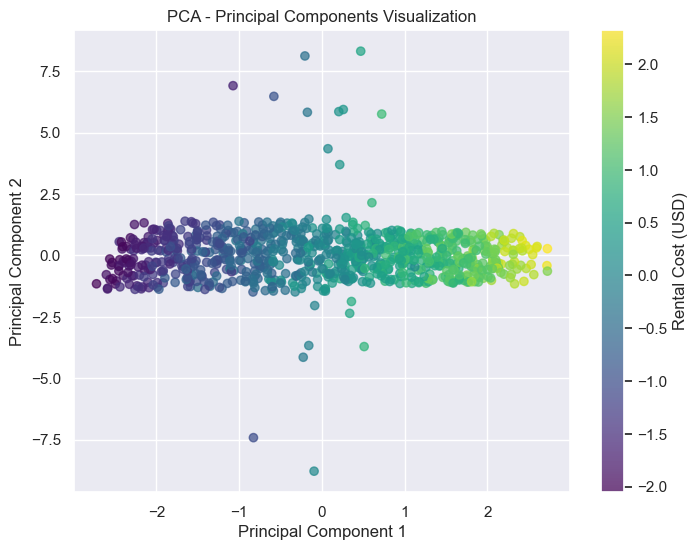

PCA Completed!


In [390]:
# Applying PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(bikes_encoded[numeric_cols])

# Plotting PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, c=bikes_encoded['Bike_Rental_Cost_USD'], cmap='viridis')
plt.colorbar(label='Rental Cost (USD)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Principal Components Visualization')
plt.grid(True)
plt.show()

print("PCA Completed!")

In this The PCA scatter plot, we can see two main patterns in the data:
1) PC1 (x-axis) - this captures most of the variation and is closely tied to bike rental cost. Moving from left to right, rental costs increase (purple = low cost, yellow = high cost).
2) PC2 (y-axis) - this captures smaller differences, highlighting outliers above and below the center. These differences might relate to factors like rider age, distance, or ride duration.

Thus, key insight is that PC1 mainly reflects cost, while PC2 highlights smaller groups based on other ride features.

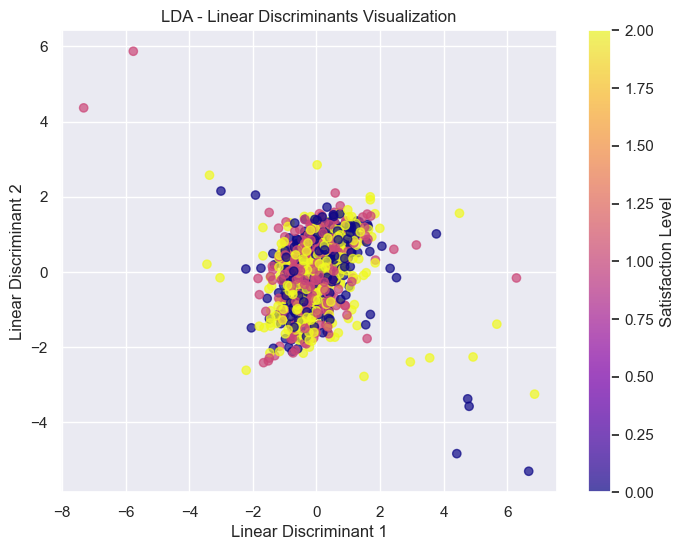

LDA Completed!


In [395]:
# Applying LDA for Dimensionality Reduction
lda = LDA(n_components=2)
lda_result = lda.fit_transform(bikes_encoded[numeric_cols], bikes_encoded['Rider Satisfaction'])

# Plotting LDA
plt.figure(figsize=(8, 6))
plt.scatter(lda_result[:, 0], lda_result[:, 1], alpha=0.7, c=bikes_encoded['Rider Satisfaction'], cmap='plasma')
plt.colorbar(label='Satisfaction Level')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA - Linear Discriminants Visualization')
plt.grid(True)
plt.show()

print("LDA Completed!")

In the LDA scatter plot, we can observe separate rider satisfaction levels based on features in the data.
1) LD1 (x-axis) - mainly separates satisfaction levels, with a color shift from low satisfaction (purple) on the left to high satisfaction (yellow) on the right. However, overlap is clear between groups.
2) LD2 (y-axis) - adds extra separation, identifying a few outliers (points far above or below the main cluster) with unique feature combinations.

Hence, key insight is that while the LDA plot partially separates satisfaction levels, there’s still some overlap, showing that the features used can distinguish groups but aren’t perfect for full separation.

<h1>Part 2: Machine Learning</h1>

<h2>Section 1. Supervised vs Unsupervised Learning</h2>

First, we will define the ML approach, that is Supervised vs Unsupervised Learning. In this case, since we have labeled data (e.g., Rider Satisfaction, Rental Cost), supervised learning is a more logical option given that tasks such as prediction of rental cost and classification of satisfaction levels are inherently supervised.

Conversely, Unsupervised Learning allows to find patterns or clusters without labeled outcomes. Nevertheless, it's not suitable in this scenario as 
the dataset already has clear labels (like Satisfaction Levels). Thus, clustering may help identify hidden patterns but doesn’t directly address business goals.

<h2>Section 2. Regression Modeling</h2>

In [246]:
# Regression Modeling Script - Predicting Rental Cost

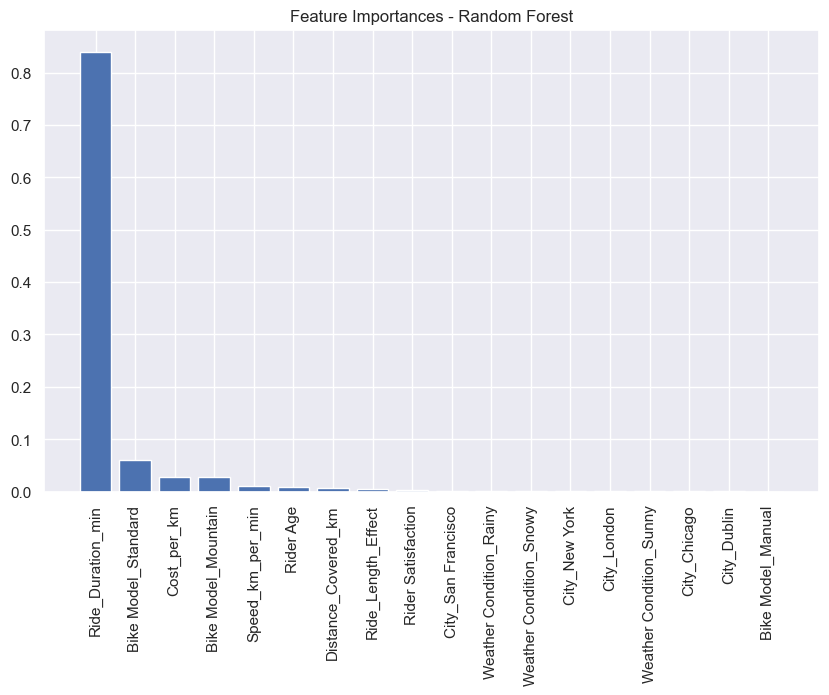

C:\Users\godut\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\godut\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\godut\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\godut\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

               Model  R2 Score      RMSE       MAE
0  Linear Regression  0.938862  0.253437  0.203952
1      Decision Tree  0.857542  0.386866  0.293621
2      Random Forest  0.940843  0.249298  0.194530
3  Gradient Boosting  0.941545  0.247815  0.196594
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Performance:
R2 Score: 0.9402001786909768
RMSE: 0.25064908801864444
MAE: 0.19607746163815956


C:\Users\godut\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


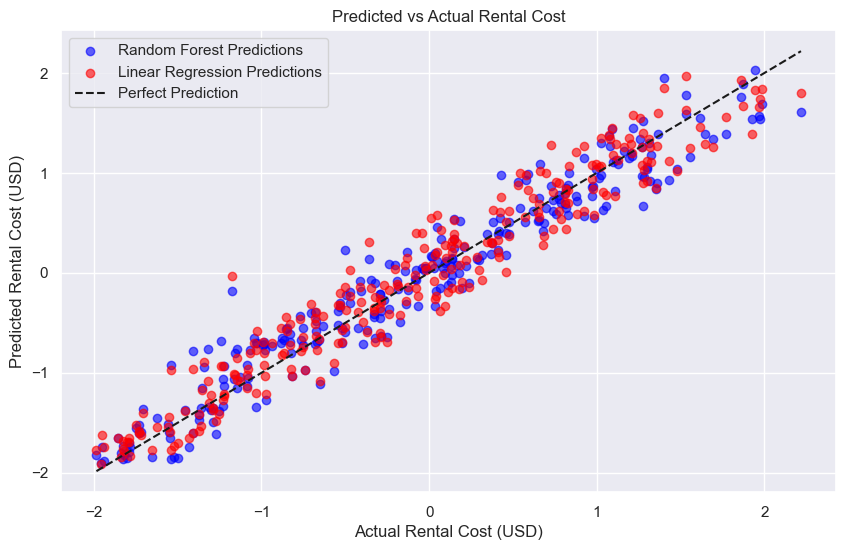

Regression Modeling Completed!


In [399]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

### Feature Importance with Random Forest
X = bikes_encoded.drop('Bike_Rental_Cost_USD', axis=1)
y = bikes_encoded['Bike_Rental_Cost_USD']

# Random Forest for Feature Importance 
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Plotting Feature Importance
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

### Step 2 - Regression Models 

# Training-Testing Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defininibg Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Training and Evaluating Models
results = []
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    results.append([name, r2, rmse, mae])

# Printing Results Table
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'RMSE', 'MAE'])
print(results_df)

### Hyperparameter Tuning with GridSearchCV (Random Forest Example)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Printing Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluating Tuned Model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

r2_best = r2_score(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
mae_best = mean_absolute_error(y_test, y_pred_best)

print("Best Model Performance:")
print(f"R2 Score: {r2_best}")
print(f"RMSE: {rmse_best}")
print(f"MAE: {mae_best}")

### Visualization of Predictions vs Actuals for benchmarking
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions['Random Forest'], alpha=0.6, color='blue', label='Random Forest Predictions')
plt.scatter(y_test, predictions['Linear Regression'], alpha=0.6, color='red', label='Linear Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', label='Perfect Prediction')
plt.xlabel('Actual Rental Cost (USD)')
plt.ylabel('Predicted Rental Cost (USD)')
plt.legend()
plt.title('Predicted vs Actual Rental Cost')
plt.show()

print("Regression Modeling Completed!")

*Models Comparison:*

Linear Regression achieves a high R-squared of 0.9388, indicating that it explains around 94% of the variance in target variable, Rental Cost. 
Decision Tree has a lower R-squared of 0.86, indicating that it is less accurate at predicting rental cost. 
Random Forest and Gradient Boosting slightly outperfom Linear Regression, with R-squared of 0.9408 and 0.9415 and also lower RMSE/MAE.

After hyperparameter tuning, the best performing model (Random Forest or Gradient Boosting) yields 0.94 and
RMSE \approx 0.25
MAE \approx 0.20

**This means the model’s predictions of bike rental cost are quite close to the actual costs.**

*Feature Importance (from the Random Forest)*


Ride Duration strongly dominates the prediction, meaning the length of the ride (in minutes) is by far the biggest driver of rental cost. Secondary factors are Bike Model (Standard/Mountain), Cost_per_km, and Speed_km_per_min, while Rider Age, Distance Covered, and location/weather features have more minor roles.

*Predicted vs. Actual Plots*

Both Random Forest (blue) and Linear Regression (red) predictions cluster closely around the diagonal “perfect prediction” line. Random Forest predictions allign with the line slightly better, which makes sense given its marginally higher R-squared and lower error metrics. 

**Business Insight**

As it appears that Ride Duration is quite crucial to cost, the firm should consider refining (or reinforcing) time‑based pricing schemes. Adjusting per‑minute or per‑hour rates can significantly impact overall revenue and pricing fairness.

The company could also leverage bike model premiums as Bike Model aslo is a key driver (especially Mountain or higher‑end types). Thus, the company should ensure premium models are clearly marketed, potentially at higher per‑minute or distance rates. This can capture more revenue from riders seeking performance or comfort.


Similarly, while weather and city have smaller impact, they still matter for local/seasonal promotions. The company could run time‑based incentives (e.g., off‑peak or bad‑weather discounts) to help maintain revenue and ridership during slower periods (dynamic promotions).
Customer Segmentation & Upselling

Then, given that older or longer‑distance riders might choose costlier rides or premium bikes, the firm could tailor targeted ads or loyalty incentives (e.g., free upgrades to higher bike tiers if they consistently take longer trips).

<h2>Section 3. Classification Modeling</h2>

                 Model  Accuracy
0  Logistic Regression  0.355556
1        Decision Tree  0.374074
2        Random Forest  0.362963
3    Gradient Boosting  0.374074
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Performance:
Accuracy: 0.40370370370370373
Confusion Matrix:
 [[15 22 46]
 [10 40 29]
 [ 9 45 54]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.44      0.18      0.26        83
         1.0       0.37      0.51      0.43        79
         2.0       0.42      0.50      0.46       108

    accuracy                           0.40       270
   macro avg       0.41      0.40      0.38       270
weighted avg       0.41      0.40      0.39       270



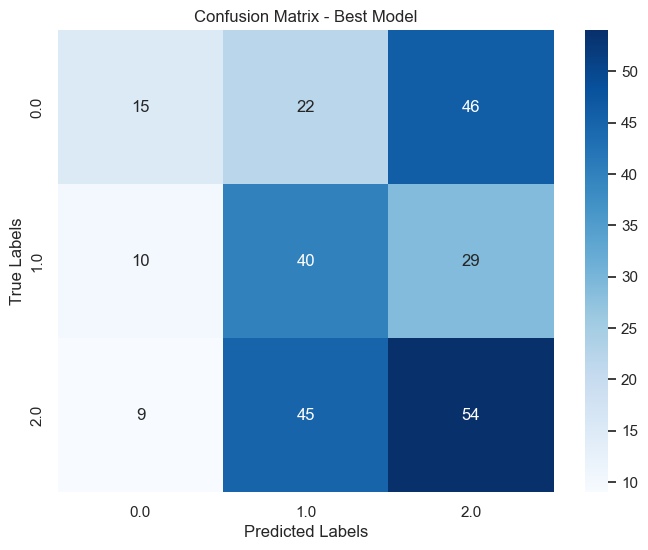

Classification Modeling Completed!


In [407]:
# Classification Modeling Script - Predicting Satisfaction Levels

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

### Data Prep
X = bikes_encoded.drop('Rider Satisfaction', axis=1)
y = bikes_encoded['Rider Satisfaction']

# Training-Testing Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 2 Classification Models 

# Defining Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Training and Evaluating Models
results = []
predictions = {}
probs = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    if len(np.unique(y_test)) == 2:  # Binary classification
        probs[name] = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    results.append([name, accuracy])

# Results Table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(results_df)

### Hyperparameter Tuning (Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Printing Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluating Tuned Model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

print("Best Model Performance:")
print(f"Accuracy: {accuracy_best}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

### Visualization - Confusion Matrix for Best Model comparison
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Best Model')
plt.show()

print("Classification Modeling Completed!")

**Model Accuracy**

Among testes models (Logistic Regression, Decision Tree, Random Forest and Gradient Boosting), best overall accuracy is ~40%, which is not very high—implying the model often misclassifies satisfaction levels.

**Confusion Matrix & Classification**

The confusion matrix shows substantial overlap among the three classes as none of the models cleanly separates them. Precision, recall, and F1 for each class remain in the 0.3–0.5 range, confirming moderate to low performance. Class “1.0” (middle category) gets somewhat better recall (0.51) but still misclassifies frequently.

**Interpretation**
The 3‑class target may be difficult to distinguish given the available features (e.g., Rider Age, Distance, Weather, etc.). Thus, additional feature engineering or more focused data collection might be needed to improve predictive power.

Given this, we should refine or revisit target classes. This way, if “Satisfaction” is critical to business decisions, we could simplify to two main categories (“High” and “Not High”) or gather more specific satisfaction metrics to reduce overlap.

We could also enhance data collection by add features that would influence rider satisfaction (bike condition, wait time, ride comfort). Richer data may help the model better differentiate among the classes.

                 Model  Accuracy
0  Logistic Regression  0.355556
1        Decision Tree  0.374074
2        Random Forest  0.362963
3    Gradient Boosting  0.374074
4                  SVM  0.396296
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Performance:
Accuracy: 0.40370370370370373
Confusion Matrix:
 [[15 22 46]
 [10 40 29]
 [ 9 45 54]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.44      0.18      0.26        83
         1.0       0.37      0.51      0.43        79
         2.0       0.42      0.50      0.46       108

    accuracy                           0.40       270
   macro avg       0.41      0.40      0.38       270
weighted avg       0.41      0.40      0.39       270



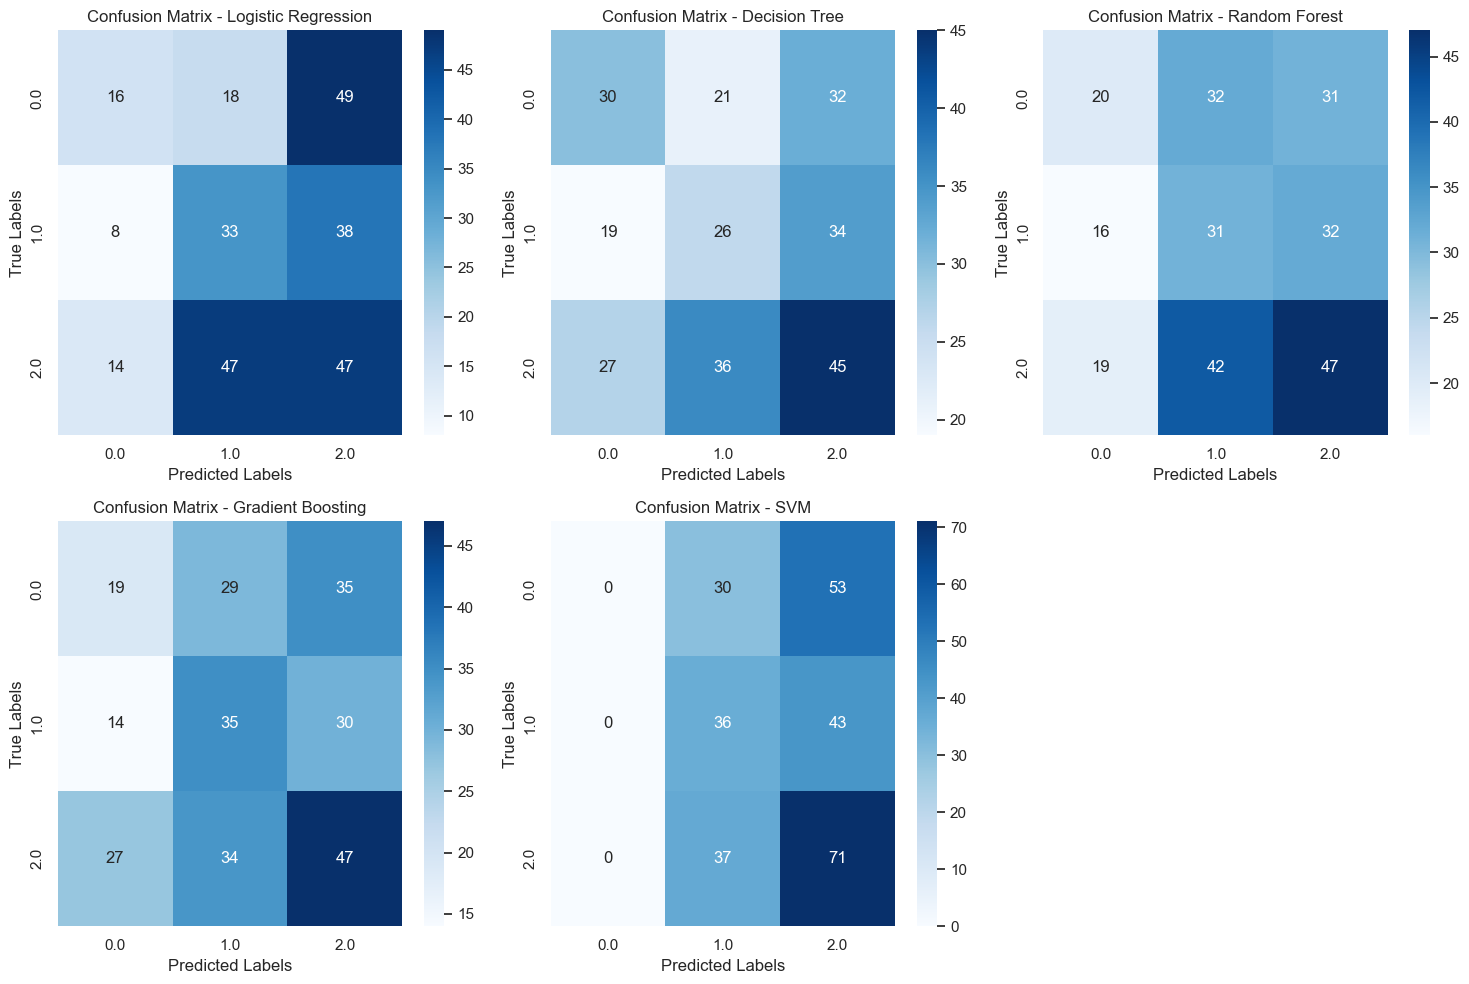

Classification Modeling Completed!


In [409]:
# Adding SVM - Classification Modeling Script - Predicting Satisfaction Levels

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

### Data Prep
X = bikes_encoded.drop('Rider Satisfaction', axis=1)
y = bikes_encoded['Rider Satisfaction']

# Training-Testing Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Classification Models 

# Defining Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Training and Evaluating Models
results = []
predictions = {}
probs = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    if len(np.unique(y_test)) == 2:  # Binary classification
        probs[name] = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    results.append([name, accuracy])

# Printing Results Table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(results_df)

### Hyperparameter Tuning (Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Printing Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluating Tuned Model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

print("Best Model Performance:")
print(f"Accuracy: {accuracy_best}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

### Visualization - Confusion Matrix for All Models 
plt.figure(figsize=(15, 10))
for i, (name, pred) in enumerate(predictions.items()):
    plt.subplot(2, 3, i+1)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {name}')
plt.tight_layout()
plt.show()

print("Classification Modeling Completed!")

**Model Performance**

Models tested (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, SVM) achieved accuracy between 35.6%–39.6% and the best-tuned model reached 40.4% accuracy. Nevertheless, performance remains low for predicting three satisfaction levels.

**Key Issues**

Confusion matrices show significant overlap between classes, especially for “High” satisfaction. Precision, recall, and F1-scores mostly range 0.3–0.5, indicating difficulty in clear classification.

**Recommendations**

1) Simplify the target, that is, use binary satisfaction (high vs. low/medium) to boost accuracy.
2) Improve data:collect richer features (ride quality, timing, customer feedback) to better capture satisfaction drivers.
3) Enhance feature engineering by exploring advanced techniques (text analysis) and refining models to improve performance.

So, in conclusion, it seems that current features are not fully capturing satisfaction differences. Thus, better data or simpler targets should improve the results.

<h1>Part 3: Findings</h1>

Recommendations for Operational Efficiency, Customer Satisfaction, and Pricing Strategies

**Age and Ride Duration Insights**

Rider ages (18–60) are evenly distributed, supporting broad marketing campaigns targeting both younger and older demographics. Ride durations (5–120 minutes) reflect varied usage patterns, suggesting the introduction of flexible pricing plans (e.g., short-trip discounts and long-ride packages) to cater to different needs.

**Distance and Fleet Optimization**

With distances ranging from 0.5 km to ~40 km, fleet management should be optimized for both urban short-distance trips and long-distance recreational rides based on demand clustering.

**Rental Cost Adjustments**

Most rental costs fall between $20–$35, indicating mid-range pricing. Consider premium pricing tiers for longer rides or premium bike models to boost revenue.

**City-Specific Strategies**

High rentals in London and New York suggest fleet expansion and targeted marketing in these cities.
Low demand in Dublin warrants a market analysis to understand barriers and evaluate marketing or pricing adjustments.

**Weather Solutions**

Balanced rentals across weather conditions (rainy, cloudy, sunny) highlight the opportunity to promote weather-resistant gear and bikes to encourage usage during bad weather.

**Bike Model Preferences**

Demand for Mountain, Standard, and Electric bikes is balanced, indicating equal marketing focus. However, investigate the manual bike data anomaly for accuracy.

**Satisfaction Improvements**

Satisfaction levels show improvement opportunities, especially in medium and low categories. Focus on service enhancements like better bike maintenance, personalized follow-ups, and discounts for dissatisfied riders. Simplify satisfaction metrics into high vs. low categories for better prediction and actionable insights.

**Conclusion**
By aligning pricing plans with ride duration, optimizing fleet placement for city-specific demand, and addressing satisfaction gaps through richer data and service improvements, the company can enhance efficiency, customer experience, and revenue growth.